<a href="https://colab.research.google.com/github/JacekPardyak/tb-data-science-talks/blob/master/2022-10-27/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Network Analysis
Graph (aka network) is a mathematical structure composed of vertices (aka nodes, points) and relations between them called edges (aka links, lines). 
Important networks:
- *inter*-connected-computer-*net*-work
- Social Network
- Rail Network
- ...
***

In [34]:
install.packages('tidygraph')
install.packages('ggraph')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [35]:
# An undirected multigraph with 1 component (multigraph if there is a loop)
library(tidyverse)
library(tidygraph)
nodes <- tibble(name = c("Hadley", "David", "Romain", "Julia"))
edges <- data.frame(from = c(1, 1, 1, 2, 3, 3, 4, 4, 4),
                                 to = c(2, 3, 4, 1, 1, 2, 1, 2, 3))
network <- tbl_graph(nodes = nodes, edges = edges, directed = F)
network

# A tbl_graph: 4 nodes and 9 edges
#
# An undirected multigraph with 1 component
#
# Node Data: 4 × 1 (active)
  name  
  <chr> 
1 Hadley
2 David 
3 Romain
4 Julia 
#
# Edge Data: 9 × 2
   from    to
  <int> <int>
1     1     2
2     1     3
3     1     4
# … with 6 more rows

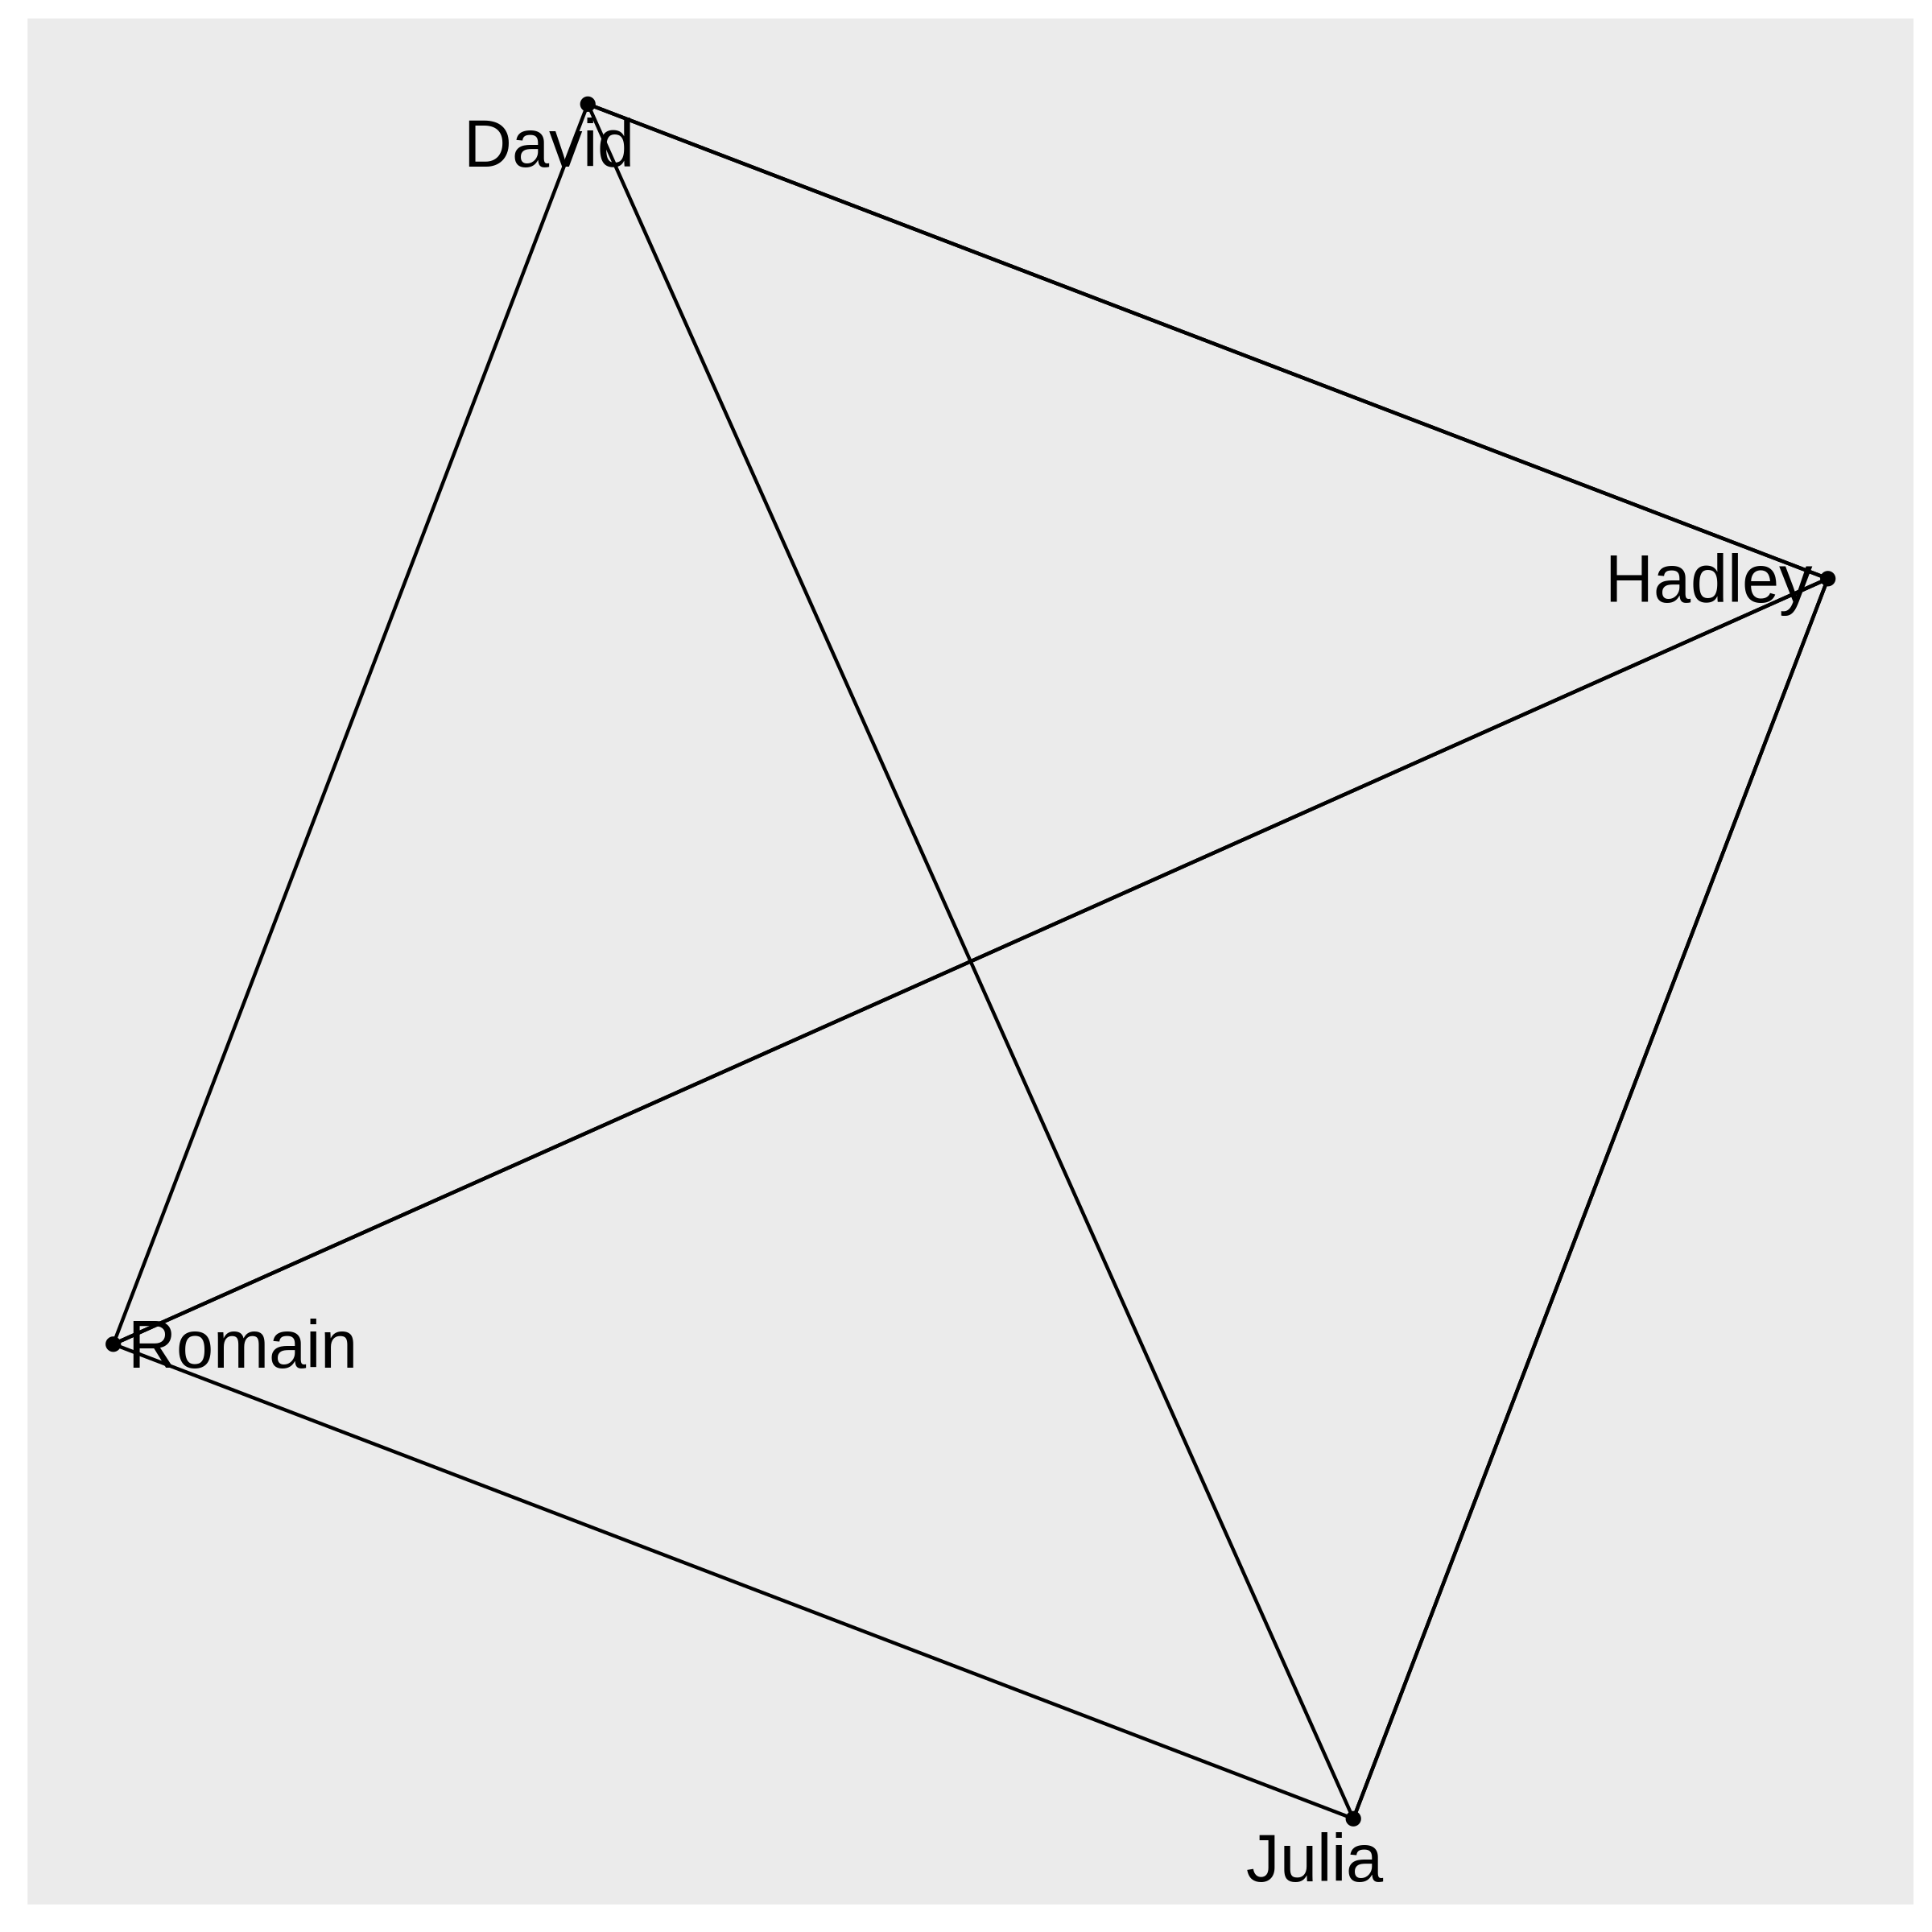

In [36]:
library(ggraph)
network %>%
  ggraph(layout = "kk") +
    geom_node_point() +
    geom_edge_link()  + 
    geom_node_text(aes(label = name), repel = TRUE, size = 7)

# A tbl_graph: 4 nodes and 9 edges
#
# A directed simple graph with 1 component
#
# Node Data: 4 × 1 (active)
  name  
  <chr> 
1 Hadley
2 David 
3 Romain
4 Julia 
#
# Edge Data: 9 × 2
   from    to
  <int> <int>
1     1     2
2     1     3
3     1     4
# … with 6 more rows

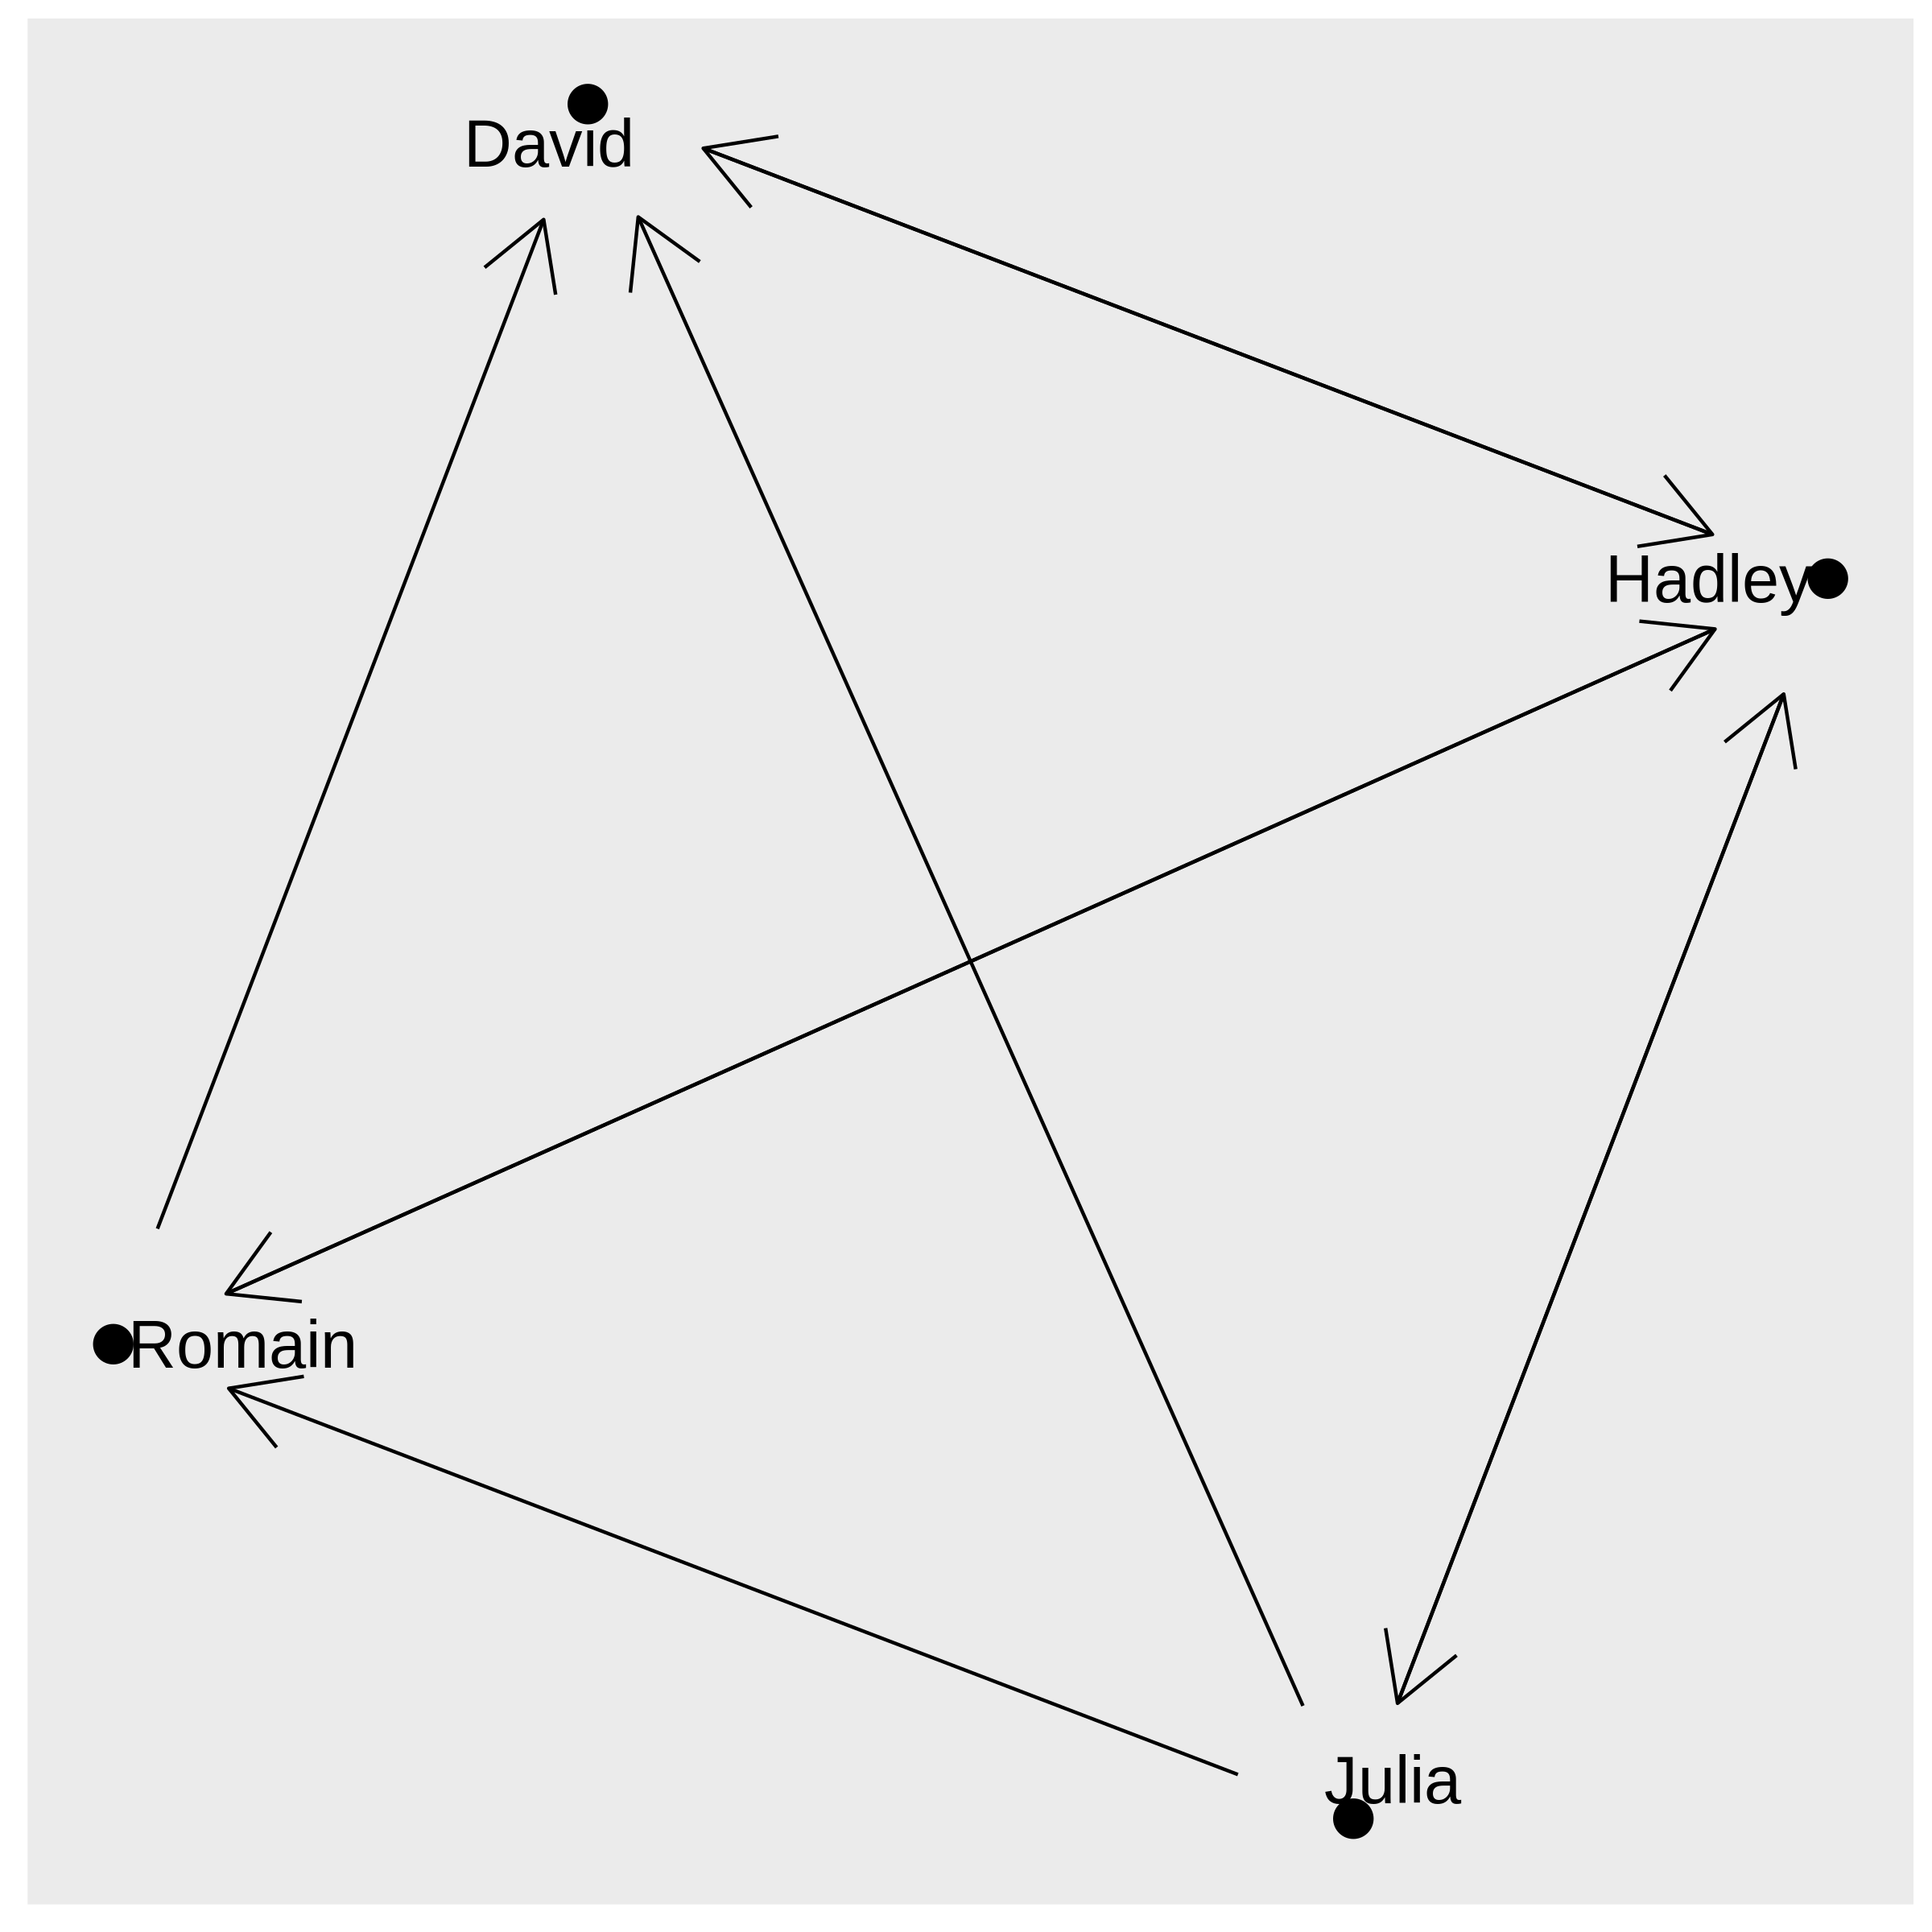

In [37]:
# A directed simple graph with 1 component
network <- tbl_graph(nodes = nodes, edges = edges, directed = T)
network
network %>%
  ggraph(layout = "kk") +
    geom_node_point(size = 5) +
    geom_edge_link(arrow = arrow(length = unit(8, 'mm')), 
                   end_cap = circle(13, 'mm'), 
                   start_cap = circle(13, 'mm'))  + 
    geom_node_text(aes(label = name), repel = TRUE, size = 7)

# Analysis of the EUR-lex (European Union Law) Networks

In a selected Directory of legal acts we want to identify most important documents. Important here means or:
- (hub) large number of outgoing links
- (authority) large number of incoming links from hubs.

https://eur-lex.europa.eu/browse/directories/legislation.html

In [38]:
system('sudo add-apt-repository -y ppa:cran/poppler')
system('sudo apt-get update')
system('sudo apt-get install -y libpoppler-cpp-dev')
install.packages('pdftools')
install.packages('eurlex')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [39]:
library(eurlex)
library(igraph)
types = c("directive") # "regulation", "decision" "recommendation", "intagr", "caselaw", "manual", "proposal", "national_impl")
content <- tibble()
for(type in types){
  tmp <- elx_make_query(resource_type = type, 
    directory = "16", # 16 Science, information, education and culture
    include_citations = T,  # references (links) to other legal documents
    include_force = T) %>% # boolean in_force
    elx_run_query() %>%
    filter(force == "true") %>%
    select(celex, citationcelex) %>%
    mutate(type = type)
  content <- content %>% bind_rows(tmp)  
}         
content

celex      citationcelex   type     
1  31977L0486 31974Y0212(01)  directive
2  32007L0002 31995L0046      directive
3  32007L0002 31999D0468      directive
4  32007L0002 31998L0034      directive
5  32007L0002 32003Q1231(01)  directive
6  32007L0002 32003L0004      directive
7  32007L0002 32000D0479      directive
8  32007L0002 31990R1210      directive
9  32007L0002 32003R2152      directive
10 32007L0002 32003L0098      directive
11 32007L0002 32002R0876      directive
12 32007L0002 32002D1600      directive
13 32003L0073 NA              directive
14 32014L0026 31995L0046      directive
15 32014L0026 32001R0045      directive
16 32014L0026 32005H0737      directive
17 32014L0026 32001L0029      directive
18 32014L0026 52011XG1217(01) directive
19 32014L0026 32006L0043      directive
20 32014L0026 32006L0115      directive
21 31999L0094 31980L1268      directive
22 31999L0094 31993L0116      directive
23 31999L0094 31970L0156      directive
24 31999L0094 31992L0061      directive
25 32012L0028 12010M005       directive
26 32012L0028 32012R0386      directive
27 32012L0028 32001L0029      directive
28 32009L0136 31999L0005      directive
29 32009L0136 32000L0031      directive
30 32009L0136 32002L0020      directive
⋮  ⋮          ⋮               ⋮        
61 32018L1808 12016E057       directive
62 32018L1808 12016E056       directive
63 32018L1808 31989L0552      directive
64 32018L0645 52010DC0389     directive
65 32018L0645 31996L0053      directive
66 32018L0645 32009R1072      directive
67 32018L0645 32006R0561      directive
68 32018L0645 32016R0679      directive
69 32018L0645 32001R0045      directive
70 32018L0645 52017AE1181     directive
71 32018L0645 32015L0413      directive
72 32018L0645 12016M005       directive
73 32019L1159 32009L0016      directive
74 32019L1159 52018AE4142     directive
75 32019L1159 32011R0182      directive
76 32019L1159 32016Q0512(01)  directive
77 32019L1159 32005L0036      directive
78 32022L0993 32002R2099      directive
79 32022L0993 32011R0182      directive
80 32022L0993 12016E258       directive
81 32022L0993 32005L0045      directive
82 32022L0993 32016Q0512(01)  directive
83 32022L0993 32002R1406      directive
84 32022L0993 31999L0063      directive
85 32022L0993 32005L0036      directive
86 32022L0993 52020AE5552     directive
87 32022L0993 32009H0708(01)  directive
88 32022L0993 32009L0016      directive
89 32022L0993 12016E290       directive
90 32022L0993 12016M005       directive

# For the inquisitive - how to talk to the SPARQL server?

In [40]:
install.packages('httr2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [41]:
query <- elx_make_query(resource_type = "directive", 
  directory = "16", # 16 Science, information, education and culture
  include_citations = T,
  include_force = T) # references (links) to other legal documents
query %>% cat()

PREFIX cdm: <http://publications.europa.eu/ontology/cdm#>
  PREFIX annot: <http://publications.europa.eu/ontology/annotation#>
  PREFIX skos:<http://www.w3.org/2004/02/skos/core#>
  PREFIX dc:<http://purl.org/dc/elements/1.1/>
  PREFIX xsd:<http://www.w3.org/2001/XMLSchema#>
  PREFIX rdf:<http://www.w3.org/1999/02/22-rdf-syntax-ns#>
  PREFIX owl:<http://www.w3.org/2002/07/owl#>
  select distinct ?work ?type ?celex ?force ?citationcelex where{ ?work cdm:work_has_resource-type ?type.
    VALUES (?value)
    { (<http://publications.europa.eu/resource/authority/fd_555/16>)
      (<http://publications.europa.eu/resource/authority/dir-eu-legal-act/16>)
    }
    {?work cdm:resource_legal_is_about_concept_directory-code ?value.
    }
    UNION
    {?work cdm:resource_legal_is_about_concept_directory-code ?directory.
      ?value skos:narrower+ ?directory.
    }
     FILTER(?type=<http://publications.europa.eu/resource/authority/resource-type/DIR>||
  ?type=<http://publications.europa.eu/resou

In [42]:
library(httr2)
resp =  'https://publications.europa.eu/webapi/rdf/sparql' %>%
  request() %>%
    req_url_query(query = query) %>%
    req_method("POST") %>%
    req_headers(Accept = "application/sparql-results+json") %>%
    req_user_agent("team.blue agent") %>%
    req_retry(max_tries = 3, max_seconds = 120) %>%
    req_perform()
resp

<httr2_response>

POST
https://publications.europa.eu/webapi/rdf/sparql?query=PREFIX%20cdm%3A%20%3Chttp%3A%2F%2Fpublications.europa.eu%2Fontology%2Fcdm%23%3E%0A%20%20PREFIX%20annot%3A%20%3Chttp%3A%2F%2Fpublications.europa.eu%2Fontology%2Fannotation%23%3E%0A%20%20PREFIX%20skos%3A%3Chttp%3A%2F%2Fwww.w3.org%2F2004%2F02%2Fskos%2Fcore%23%3E%0A%20%20PREFIX%20dc%3A%3Chttp%3A%2F%2Fpurl.org%2Fdc%2Felements%2F1.1%2F%3E%0A%20%20PREFIX%20xsd%3A%3Chttp%3A%2F%2Fwww.w3.org%2F2001%2FXMLSchema%23%3E%0A%20%20PREFIX%20rdf%3A%3Chttp%3A%2F%2Fwww.w3.org%2F1999%2F02%2F22-rdf-syntax-ns%23%3E%0A%20%20PREFIX%20owl%3A%3Chttp%3A%2F%2Fwww.w3.org%2F2002%2F07%2Fowl%23%3E%0A%20%20select%20distinct%20%3Fwork%20%3Ftype%20%3Fcelex%20%3Fforce%20%3Fcitationcelex%20where%7B%20%3Fwork%20cdm%3Awork_has_resource-type%20%3Ftype.%0A%20%20%20%20VALUES%20%28%3Fvalue%29%0A%20%20%20%20%7B%20%28%3Chttp%3A%2F%2Fpublications.europa.eu%2Fresource%2Fauthority%2Ffd_555%2F16%3E%29%0A%20%20%20%20%20%20%28%3Chttp%3A%2F%2Fpublications.europa

In [43]:
resp %>% resp_body_json() %>% 
  nth(2) %>% nth(3) %>% nth(1)

$work
$work$type
[1] "uri"

$work$value
[1] "http://publications.europa.eu/resource/cellar/775a4724-2086-4a06-9213-1a4e6489053b"


$type
$type$type
[1] "uri"

$type$value
[1] "http://publications.europa.eu/resource/authority/resource-type/DIR"


$celex
$celex$type
[1] "typed-literal"

$celex$datatype
[1] "http://www.w3.org/2001/XMLSchema#string"

$celex$value
[1] "31995L0046"


$force
$force$type
[1] "typed-literal"

$force$datatype
[1] "http://www.w3.org/2001/XMLSchema#boolean"

$force$value
[1] "0"


$citationcelex
$citationcelex$type
[1] "typed-literal"

$citationcelex$datatype
[1] "http://www.w3.org/2001/XMLSchema#string"

$citationcelex$value
[1] "11992E057"

# Building the EUR-lex Network

In [44]:
library(igraph)
vertices <- union(content %>% select(celex)  %>% distinct() %>% pull(),
                  content %>% select(citationcelex)  %>% distinct() %>% drop_na() %>% pull())
d <- content %>% select(celex, citationcelex)  %>% drop_na()
net <- graph_from_data_frame(d = d, vertices = vertices, directed = T) 

class(net)

[1] "igraph"

In [45]:
net

IGRAPH f2c12de DN-- 84 89 -- 
+ attr: name (v/c)
+ edges from f2c12de (vertex names):
 [1] 31977L0486->31974Y0212(01)  32007L0002->31995L0046     
 [3] 32007L0002->31999D0468      32007L0002->31998L0034     
 [5] 32007L0002->32003Q1231(01)  32007L0002->32003L0004     
 [7] 32007L0002->32000D0479      32007L0002->31990R1210     
 [9] 32007L0002->32003R2152      32007L0002->32003L0098     
[11] 32007L0002->32002R0876      32007L0002->32002D1600     
[13] 32014L0026->31995L0046      32014L0026->32001R0045     
[15] 32014L0026->32005H0737      32014L0026->32001L0029     
+ ... omitted several edges

In [46]:
E(net)       # The edges of the "net" object

V(net)       # The vertices of the "net" object

+ 89/89 edges from f2c12de (vertex names):
 [1] 31977L0486->31974Y0212(01)  32007L0002->31995L0046     
 [3] 32007L0002->31999D0468      32007L0002->31998L0034     
 [5] 32007L0002->32003Q1231(01)  32007L0002->32003L0004     
 [7] 32007L0002->32000D0479      32007L0002->31990R1210     
 [9] 32007L0002->32003R2152      32007L0002->32003L0098     
[11] 32007L0002->32002R0876      32007L0002->32002D1600     
[13] 32014L0026->31995L0046      32014L0026->32001R0045     
[15] 32014L0026->32005H0737      32014L0026->32001L0029     
[17] 32014L0026->52011XG1217(01) 32014L0026->32006L0043     
[19] 32014L0026->32006L0115      31999L0094->31980L1268     
+ ... omitted several edges

+ 84/84 vertices, named, from f2c12de:
 [1] 31977L0486      32007L0002      32003L0073      32014L0026     
 [5] 31999L0094      32012L0028      32009L0136      32014L0060     
 [9] 32018L1808      32018L0645      32019L1159      32022L0993     
[13] 31974Y0212(01)  31995L0046      31999D0468      31998L0034     
[17] 32003Q1231(01)  32003L0004      32000D0479      31990R1210     
[21] 32003R2152      32003L0098      32002R0876      32002D1600     
[25] 32001R0045      32005H0737      32001L0029      52011XG1217(01)
[29] 32006L0043      32006L0115      31980L1268      31993L0116     
[33] 31970L0156      31992L0061      12010M005       32012R0386     
[37] 31999L0005      32000L0031      32002L0020      32007D0116     
+ ... omitted several vertices

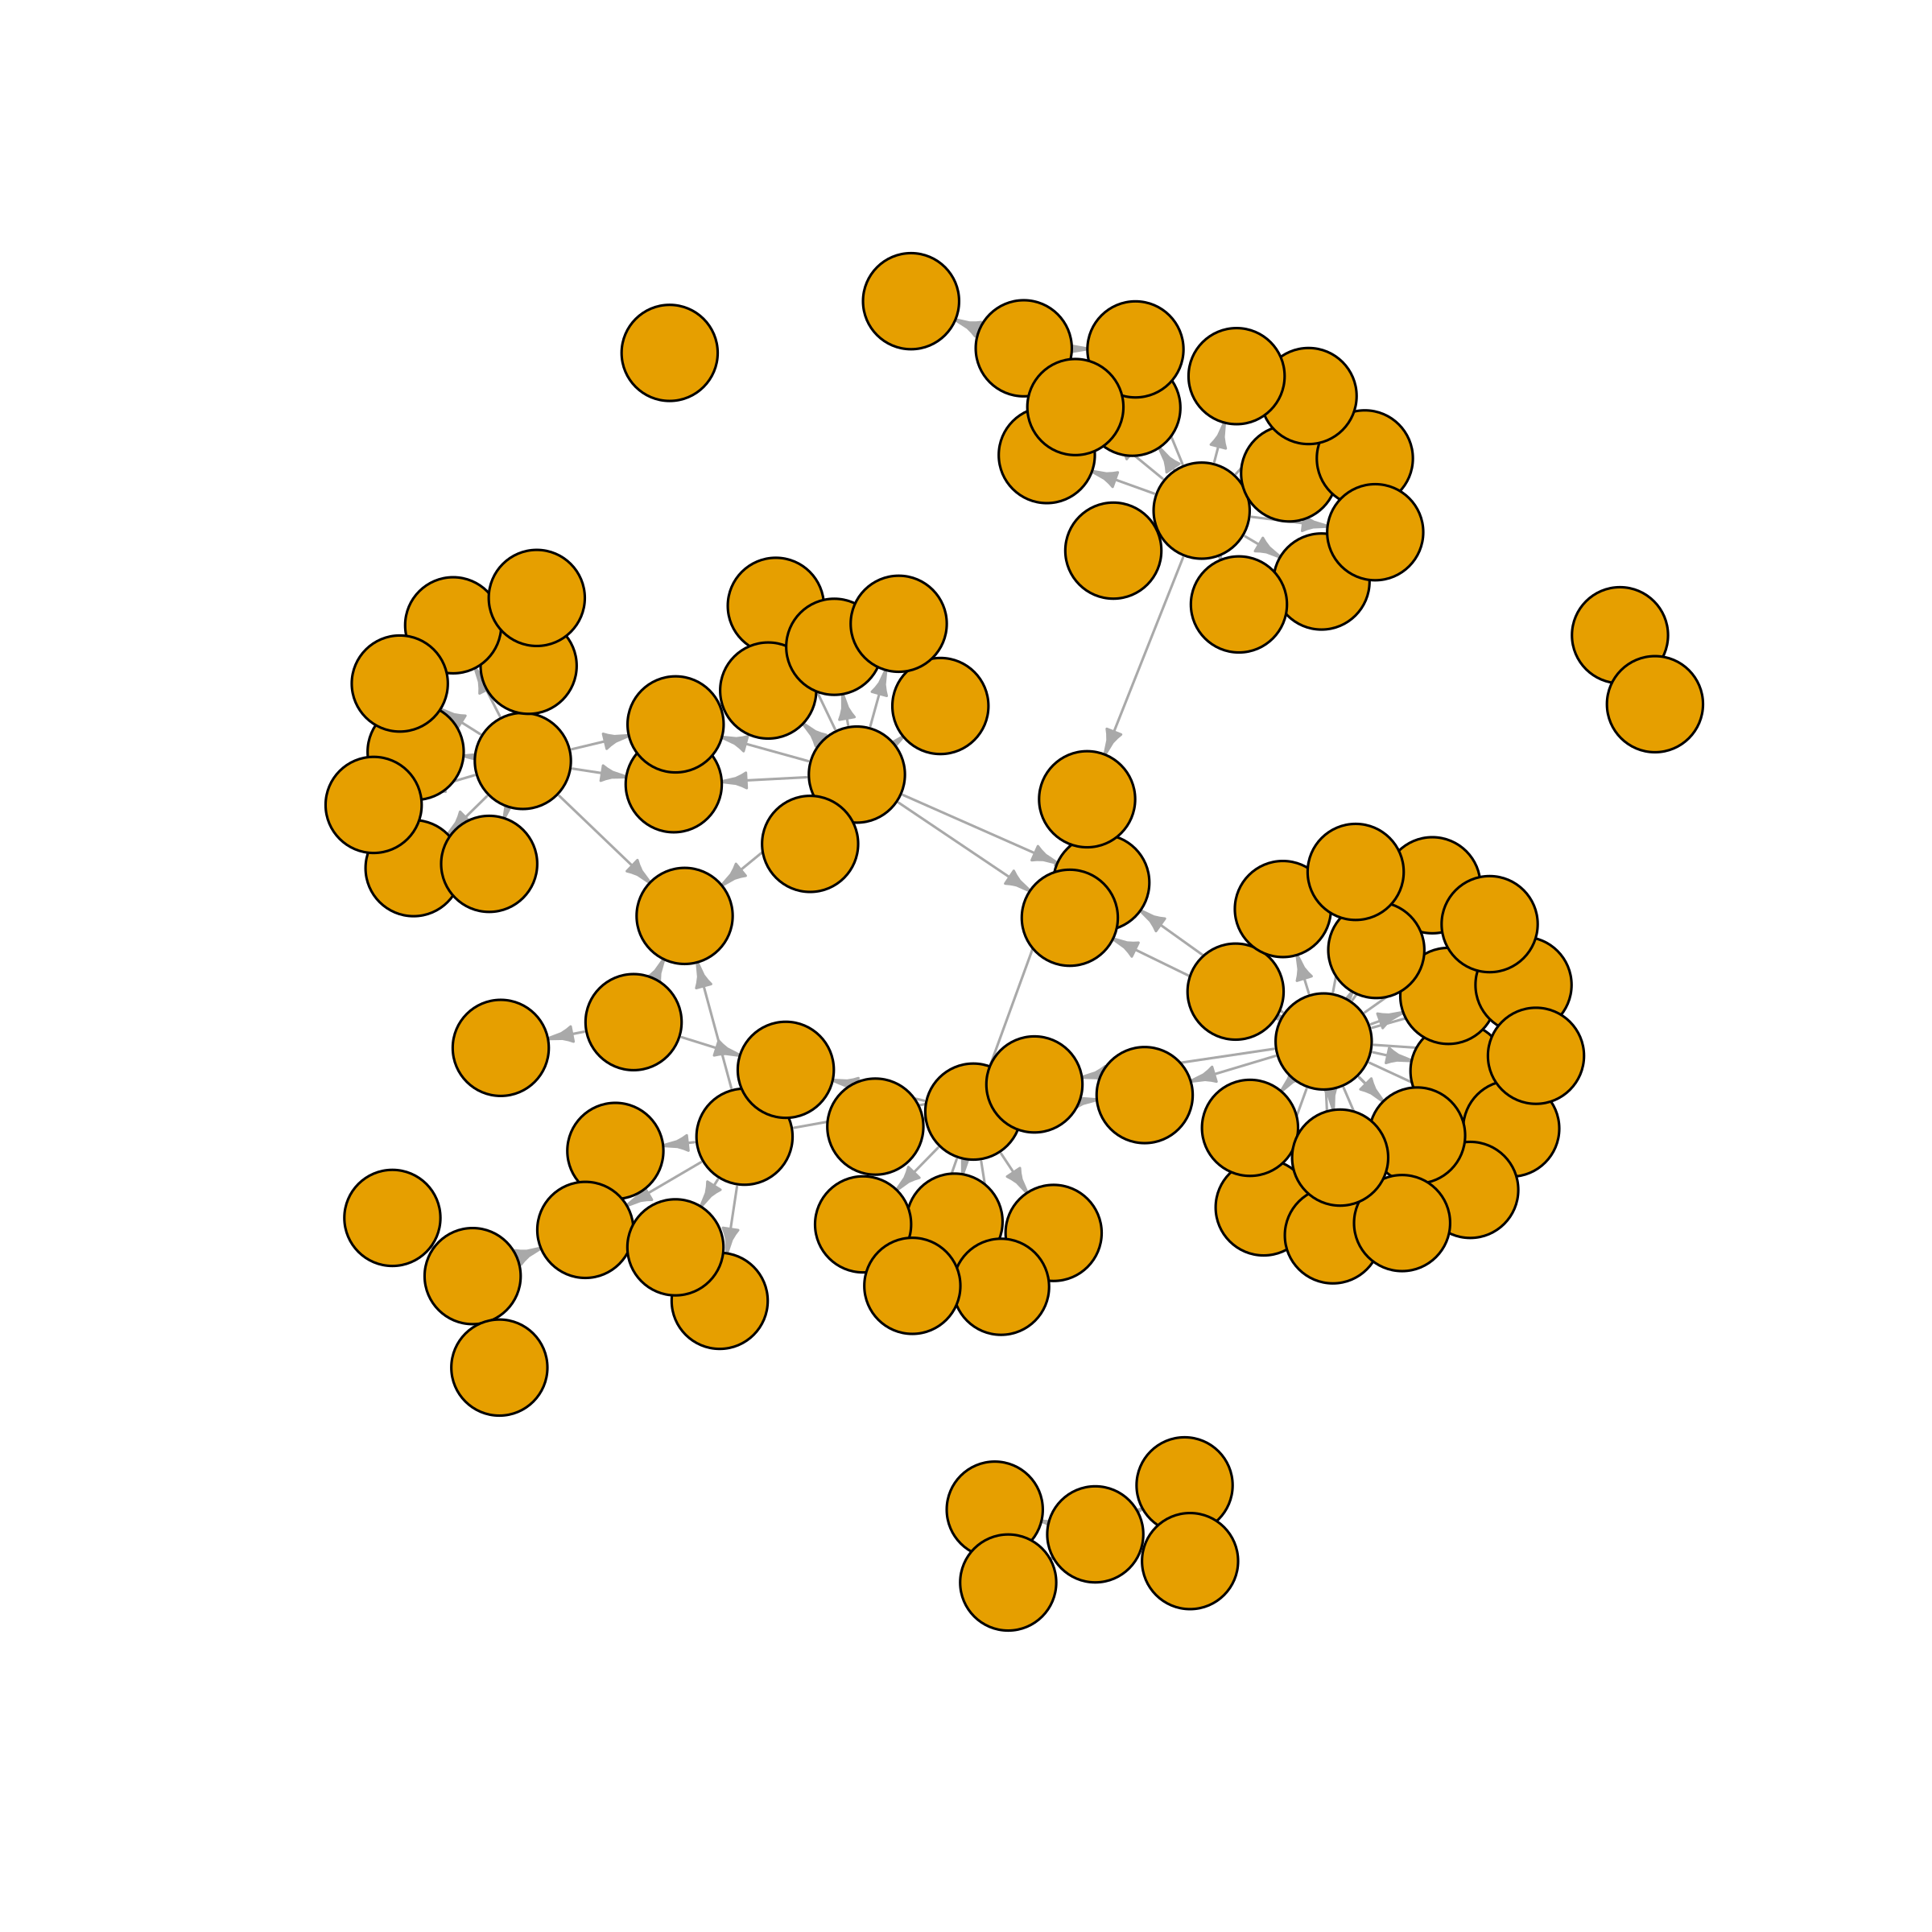

In [47]:
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 300) # set size of plots
plot(net, edge.arrow.size=.4,vertex.label=NA)

In [48]:
as_edgelist(net, names=T) %>% head()

[,1]       [,2]          
[1,] 31977L0486 31974Y0212(01)
[2,] 32007L0002 31995L0046    
[3,] 32007L0002 31999D0468    
[4,] 32007L0002 31998L0034    
[5,] 32007L0002 32003Q1231(01)
[6,] 32007L0002 32003L0004

In [49]:
as_adjacency_matrix(net) %>% head()

   [[ suppressing 84 column names ‘31977L0486’, ‘32007L0002’, ‘32003L0073’ ... ]]



6 x 84 sparse Matrix of class "dgCMatrix"
                                                                              
31977L0486 . . . . . . . . . . . . 1 . . . . . . . . . . . . . . . . . . . . .
32007L0002 . . . . . . . . . . . . . 1 1 1 1 1 1 1 1 1 1 1 . . . . . . . . . .
32003L0073 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
32014L0026 . . . . . . . . . . . . . 1 . . . . . . . . . . 1 1 1 1 1 1 . . . .
31999L0094 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1 1 1 1
32012L0028 . . . . . . . . . . . . . . . . . . . . . . . . . . 1 . . . . . . .
                                                                              
31977L0486 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
32007L0002 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
32003L0073 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
32014L0026 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
31999L0094

In [50]:
as_data_frame(net, what="edges") %>% head()

as_data_frame(net, what="vertices") %>% head()

from       to            
1 31977L0486 31974Y0212(01)
2 32007L0002 31995L0046    
3 32007L0002 31999D0468    
4 32007L0002 31998L0034    
5 32007L0002 32003Q1231(01)
6 32007L0002 32003L0004

name      
31977L0486 31977L0486
32007L0002 32007L0002
32003L0073 32003L0073
32014L0026 32014L0026
31999L0094 31999L0094
32012L0028 32012L0028

# Network and node descriptives

In [51]:
# The density of a graph is the ratio of the number of edges and the number of possible edges
edge_density(net)

[1] 0.01276535

In [52]:
# The reciprocity defines the proportion of mutual connections, in a directed graph. 
reciprocity(net)

[1] 0

In [53]:
# Transitivity measures the probability that the adjacent vertices of a vertex are connected.
transitivity(net)

[1] 0

In [54]:
# The diameter of a graph is the length of the longest from the shortest paths between any two points
# assuming undirected graph
diameter(net, directed = F)
get_diameter(net, directed = F)
# but in real, directed 
diameter(net)
get_diameter(net)

[1] 10

+ 11/84 vertices, named, from f2c12de:
 [1] 31999D0468  32007L0002  31995L0046  32014L0026  32001R0045  32018L0645 
 [7] 12016M005   32022L0993  32009L0016  32019L1159  52018AE4142

[1] 1

+ 2/84 vertices, named, from f2c12de:
[1] 31977L0486     31974Y0212(01)

+ 10/89 edges from 8d92384 (vertex names):
 [1] 32007L0002--31999D0468  32007L0002--31995L0046  32014L0026--31995L0046 
 [4] 32014L0026--32001R0045  32018L0645--32001R0045  32018L0645--12016M005  
 [7] 32022L0993--12016M005   32022L0993--32009L0016  32019L1159--32009L0016 
[10] 32019L1159--52018AE4142

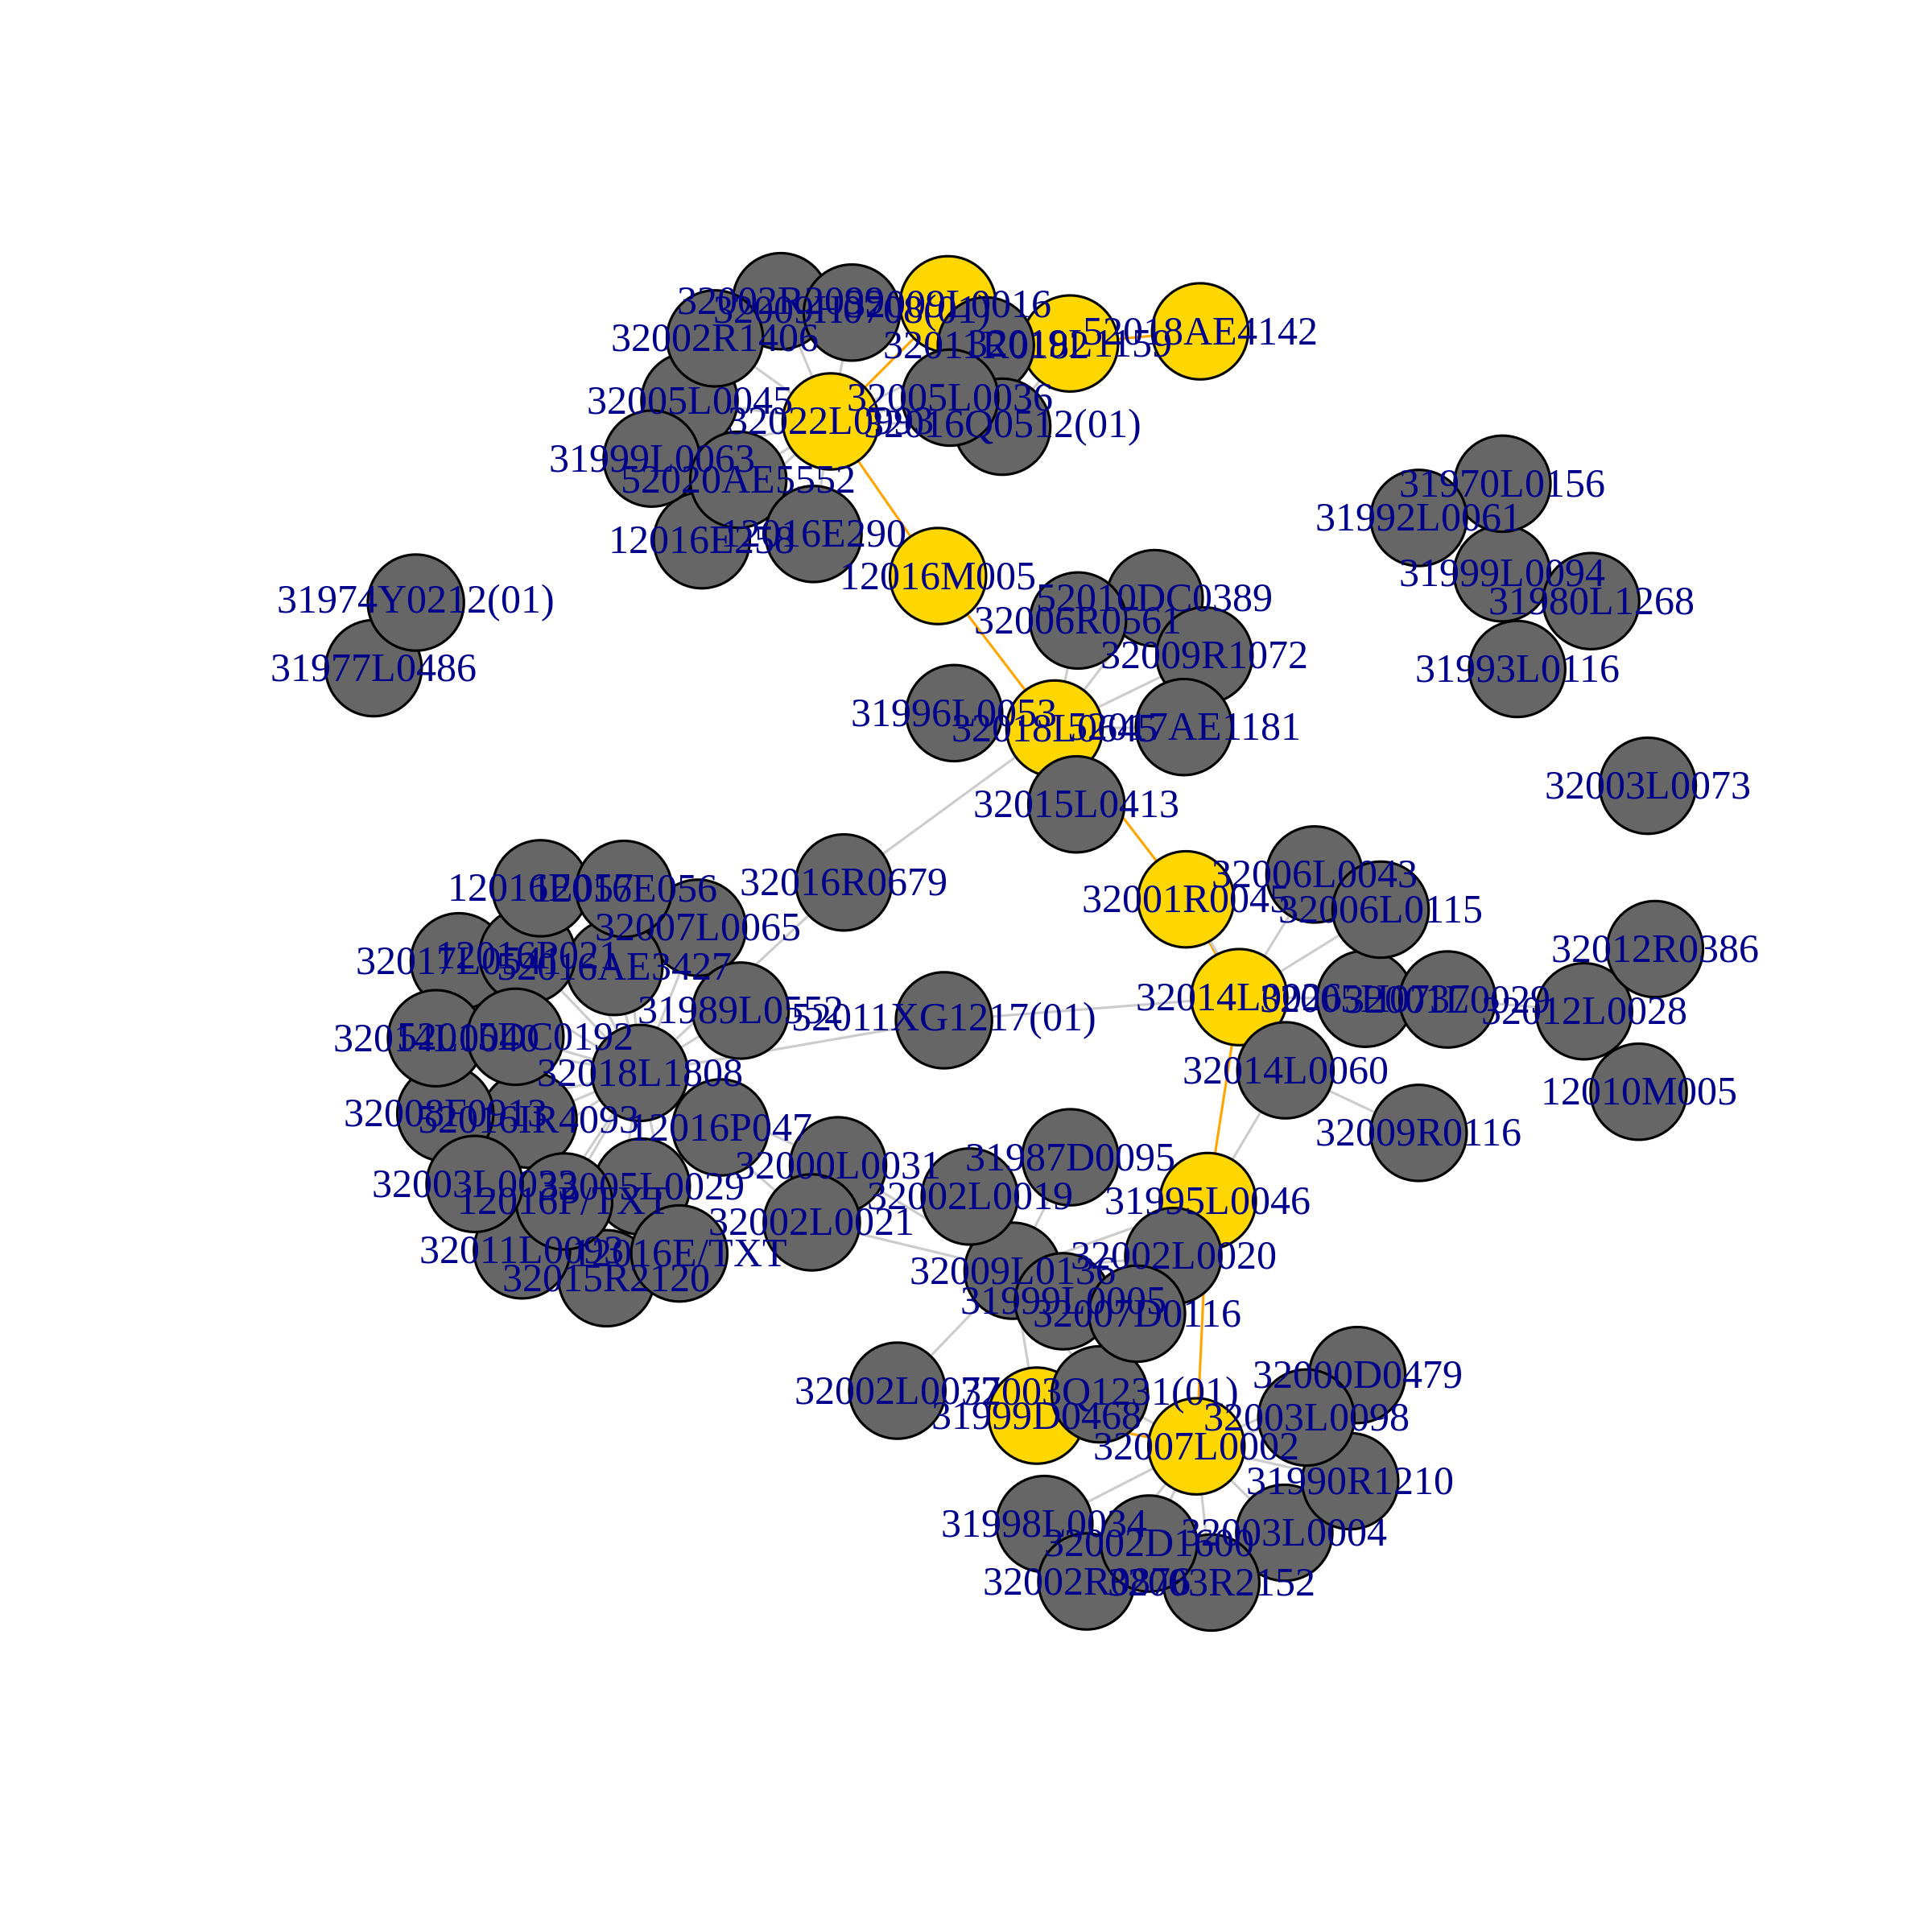

In [55]:
net_und <- graph_from_data_frame(d = d, vertices = vertices, directed = F) 
diam <- get_diameter(net_und, directed = F)
vcol <- rep("gray40", vcount(net_und))
vcol[diam] <- "gold"
ecol <- rep("gray80", ecount(net_und))
ecol[E(net_und, path=diam)] <- "orange" 

E(net_und, path=diam) #finds edges along a path, here 'diam'

plot(net_und, vertex.color=vcol, edge.color=ecol, edge.arrow.mode=0)

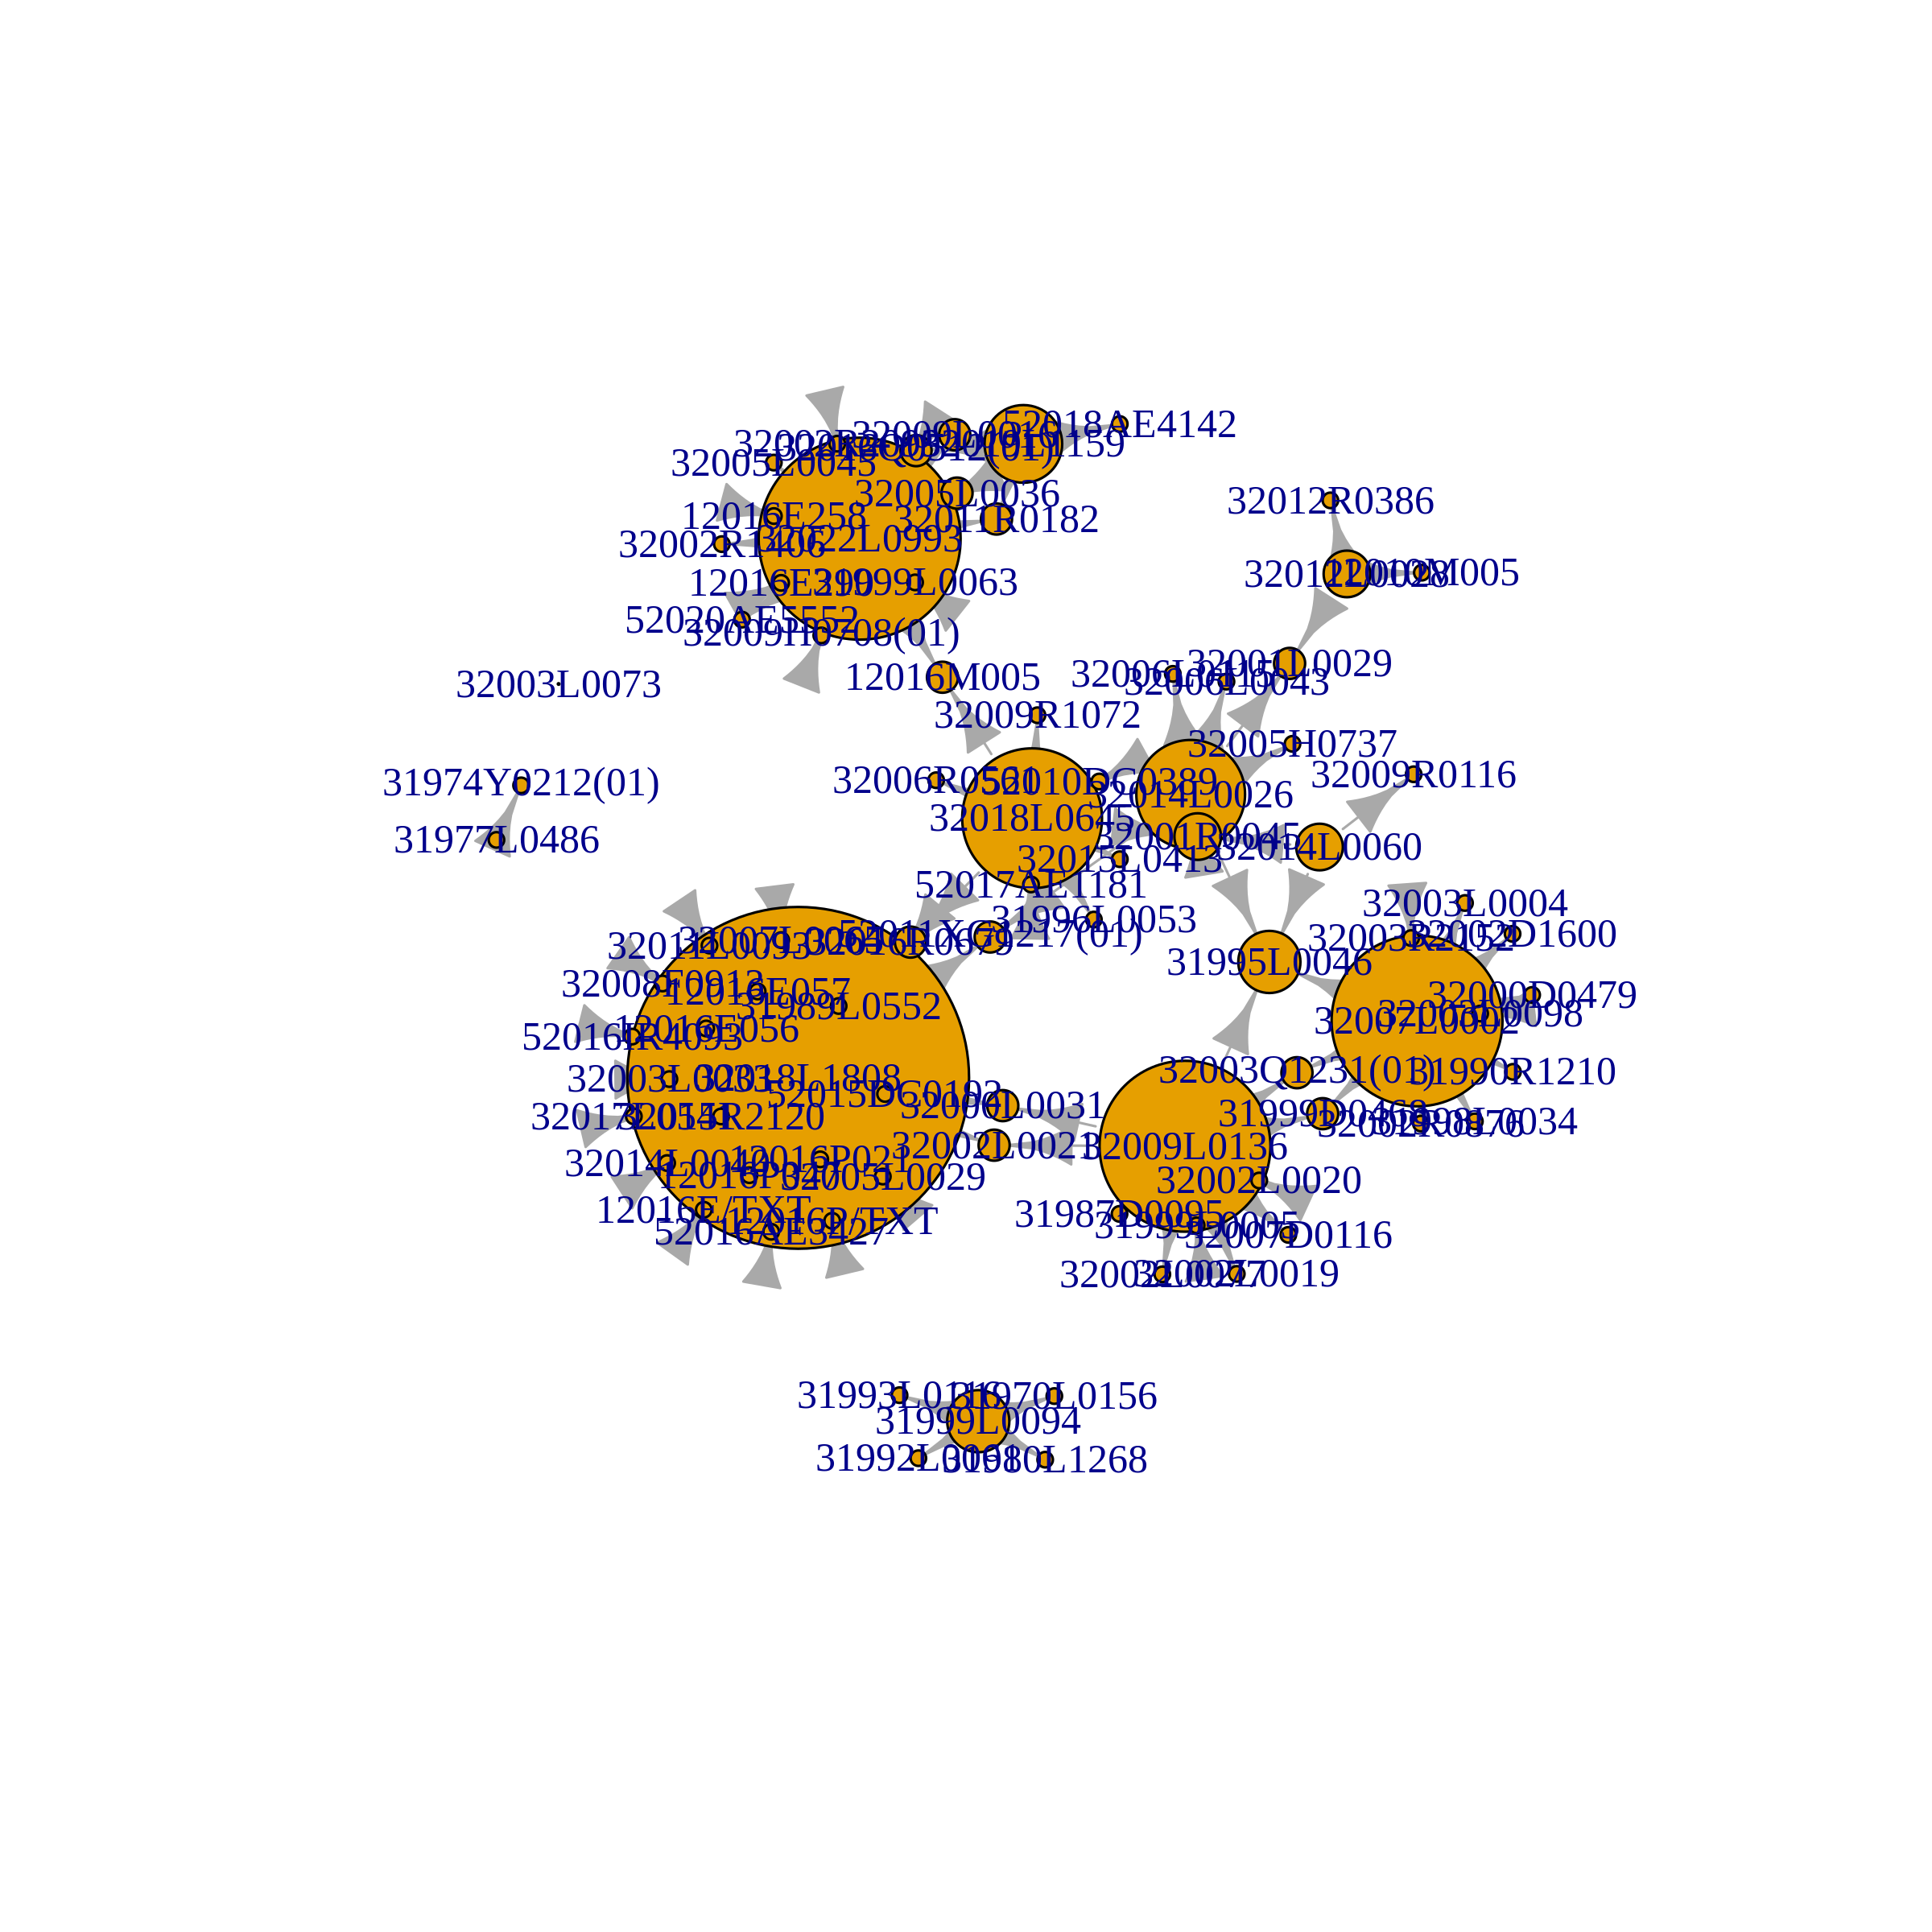

In [56]:
# Node degree - number of its adjacent edges
deg <- degree(net, mode="all")
plot(net, vertex.size=deg*3)

# Hub 
Hub is a document with a large number of outgoing links

https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX%3A32018L1808

In [57]:
hub_score(net, weights=NA) %>% .[['vector']] %>% tibble(name = names(.) , value = .) %>% arrange(desc(value)) %>% head()

name       value     
1 32018L1808 1.00000000
2 32009L0136 0.19892909
3 32014L0026 0.09002115
4 32018L0645 0.08299839
5 32007L0002 0.06166900
6 32014L0060 0.02675602

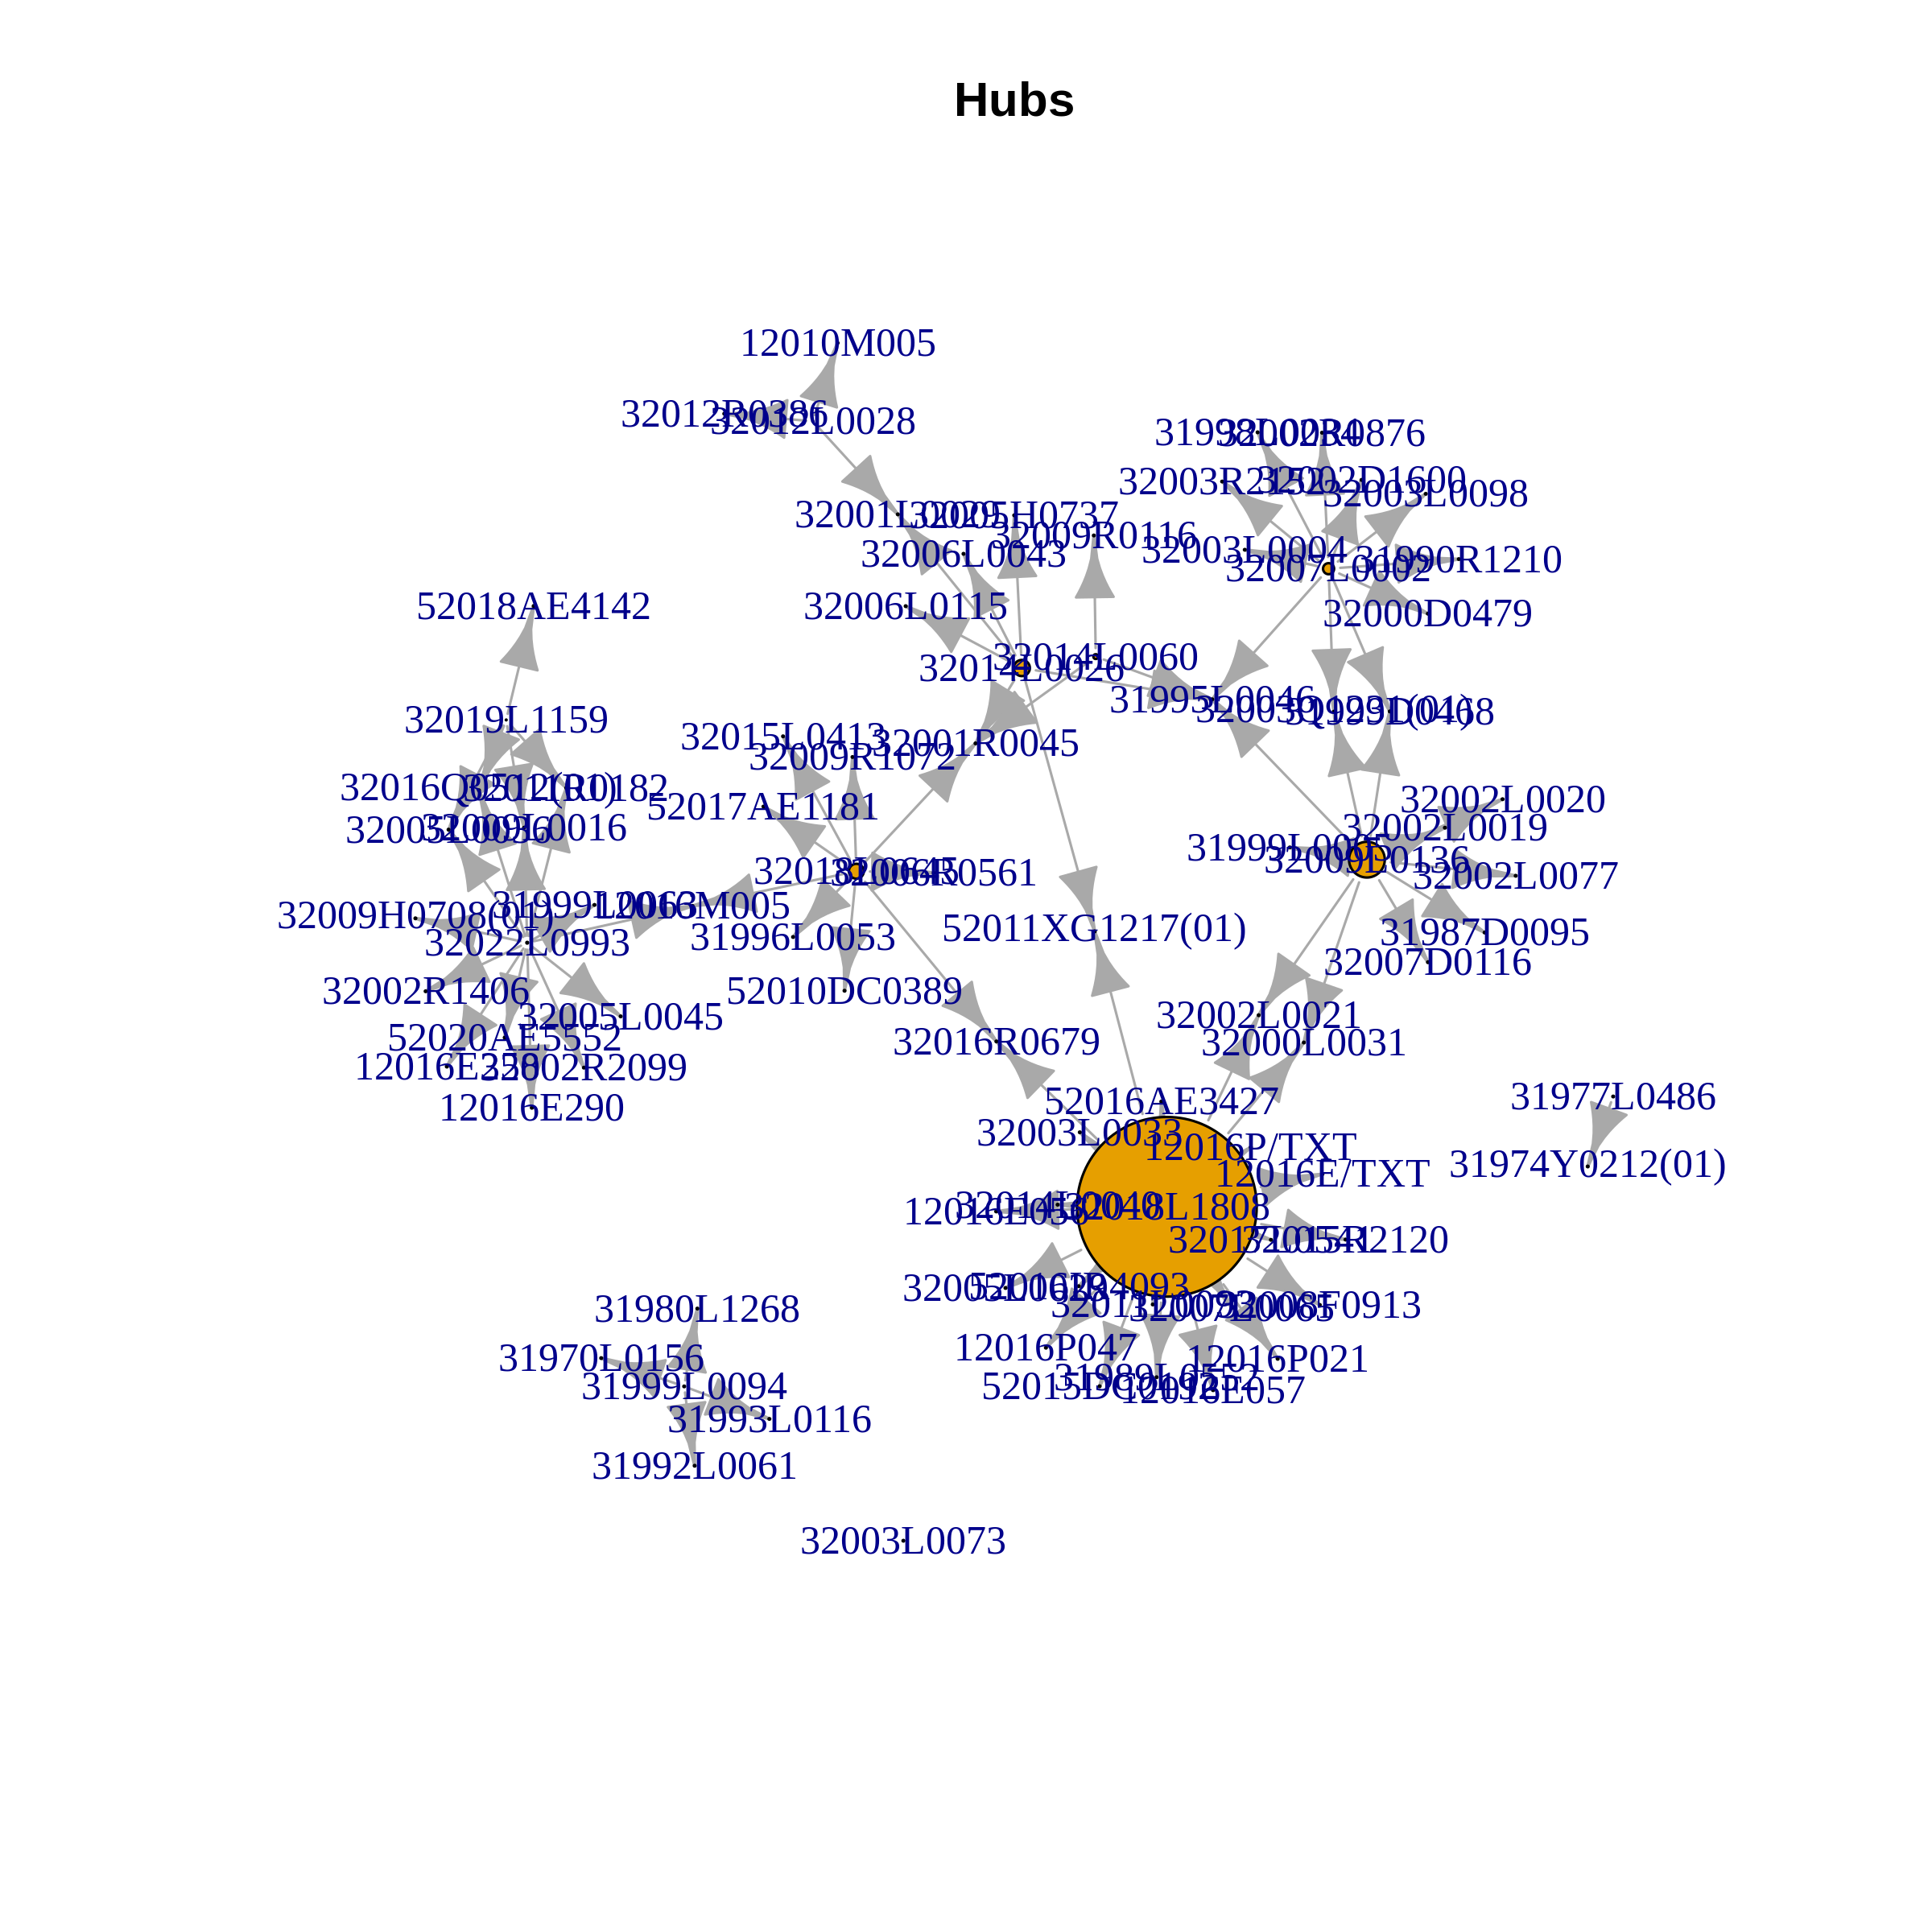

In [58]:
hs <- hub_score(net, weights=NA)$vector
plot(net, vertex.size=hs*30, main="Hubs")

# Authorities
Authorities would get many incoming links from hubs, presumably because of their high-quality relevant information.

https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX%3A32000L0031

https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX%3A32002L0021

In [59]:
authority_score(net, weights=NA) %>% .[['vector']] %>% tibble(name = names(.) , value = .) %>% arrange(desc(value)) %>% head()

name            value    
1 32000L0031      1.0000000
2 32002L0021      1.0000000
3 52011XG1217(01) 0.9091623
4 32016R0679      0.9033048
5 52016IR4093     0.8340777
6 32015R2120      0.8340777

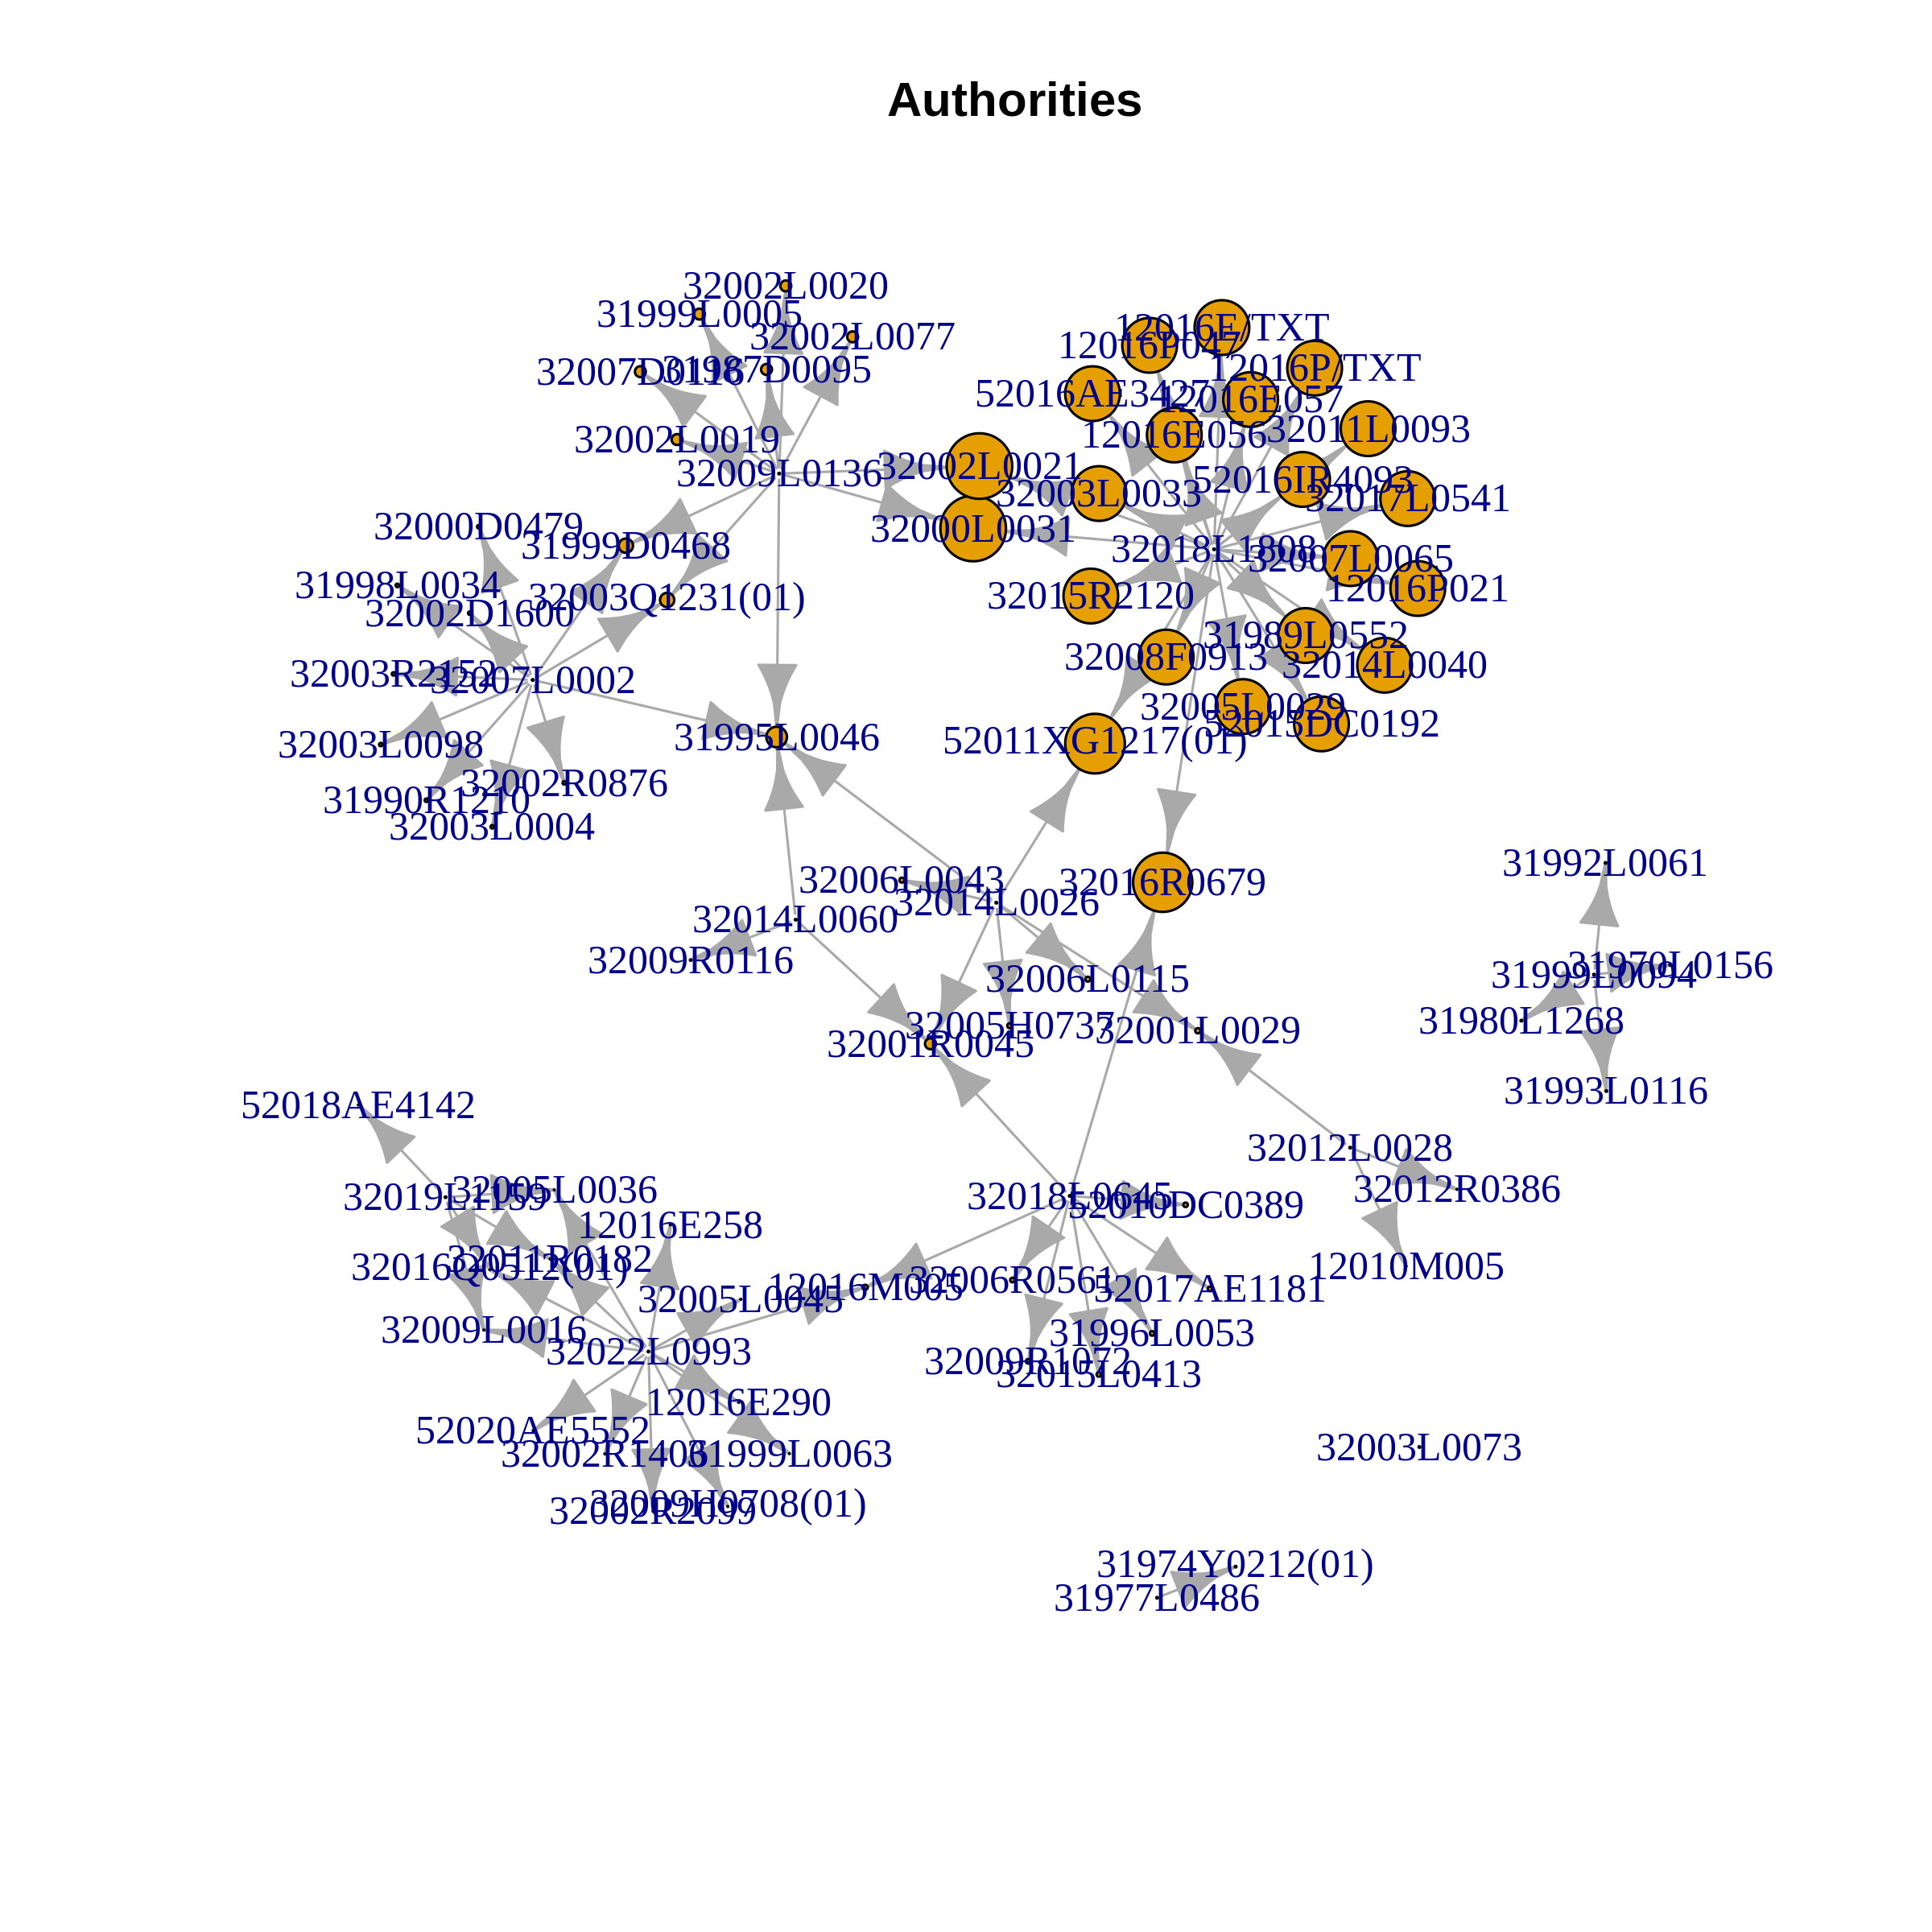

In [60]:
as <- authority_score(net, weights=NA)$vector
 plot(net, vertex.size=as*10, main="Authorities")

# Transpassing the EUR-lex network

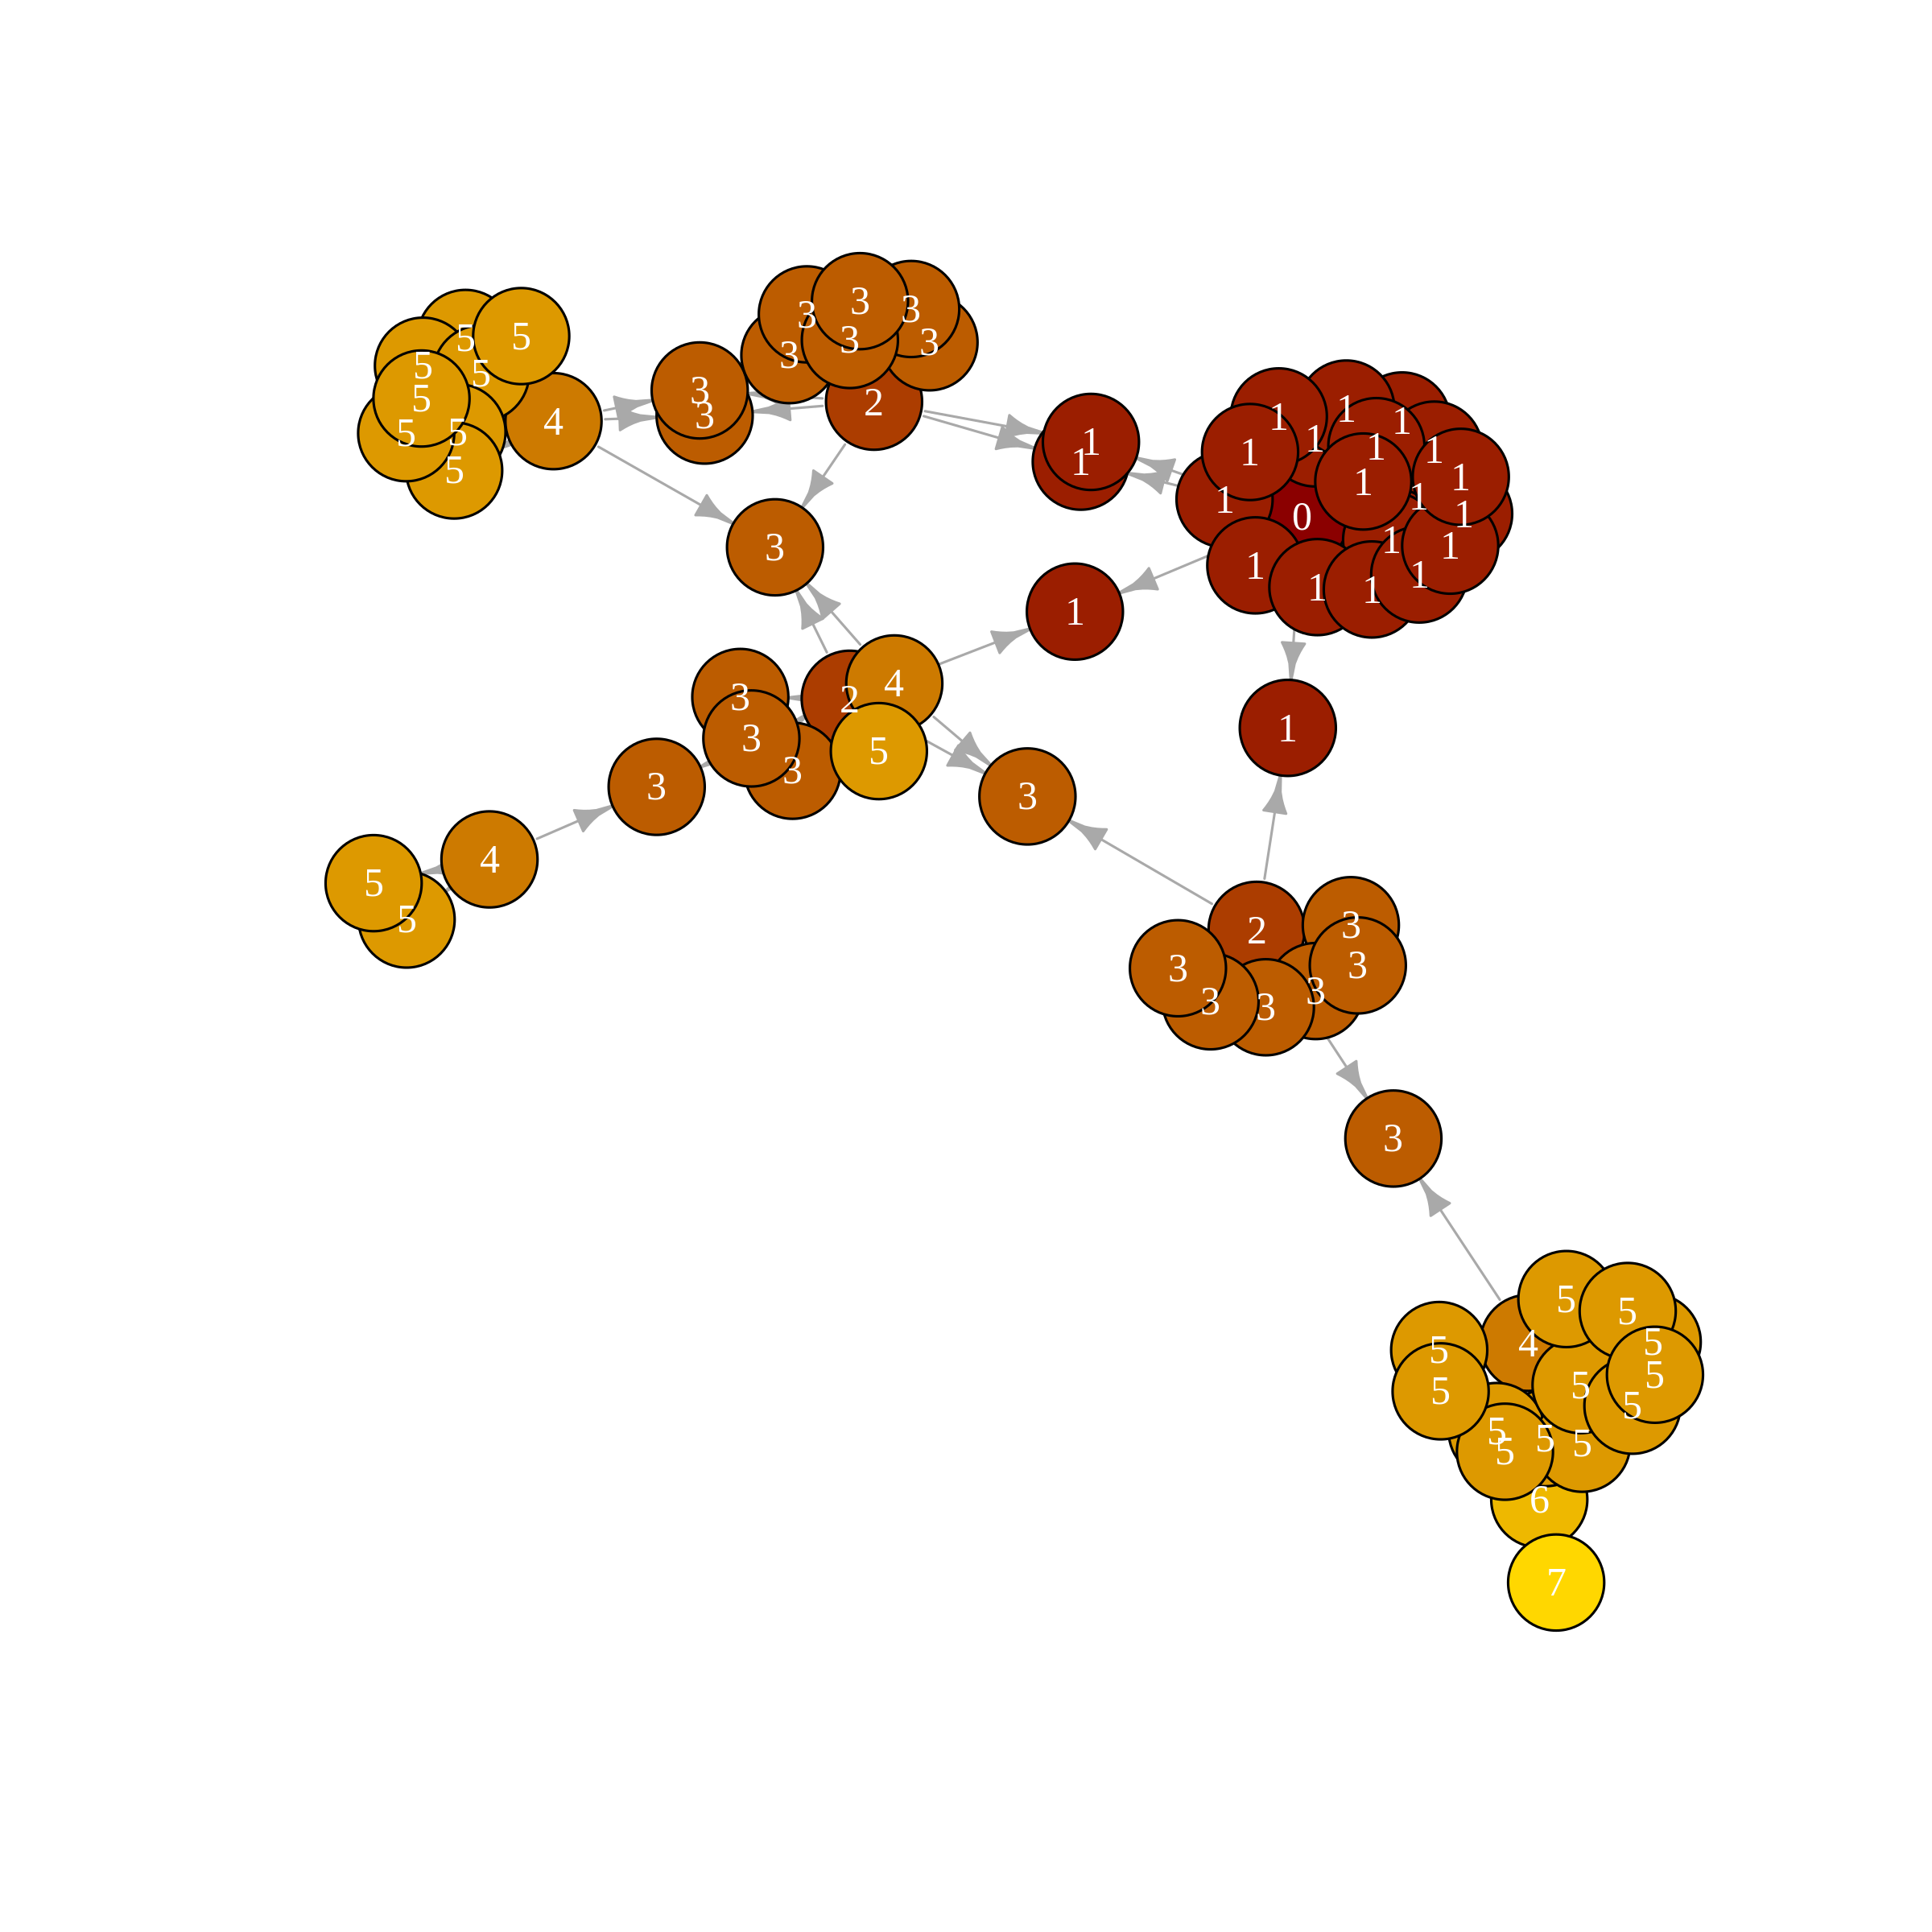

In [61]:
# Isolating the largest component containing the Hub
# checking distances to Hub
rm = distances(net) %>% as_tibble() %>% mutate(name = names(.)) %>% filter(name == "32018L1808") %>% select(which(. == Inf)) %>% names()
net_large <- delete_vertices(net, rm)
dist_from_hub <- distances(net_large, v=V(net_large)[name=="32018L1808"], to=V(net_large), weights=NA)
# Set colors to plot the distances:
oranges <- colorRampPalette(c("dark red", "gold"))
col <- oranges(max(dist_from_hub)+1)
col <- col[dist_from_hub+1]
plot(net_large, vertex.color=col, vertex.label=dist_from_hub, edge.arrow.size=.6, 
     vertex.label.color="white")

$vpath
$vpath[[1]]
+ 3/84 vertices, named, from e592780:
[1] 32002L0021 32009L0136 32000L0031


$epath
$epath[[1]]
+ 2/89 edges from e592780 (vertex names):
[1] 32009L0136--32002L0021 32009L0136--32000L0031


$predecessors
NULL

$inbound_edges
NULL


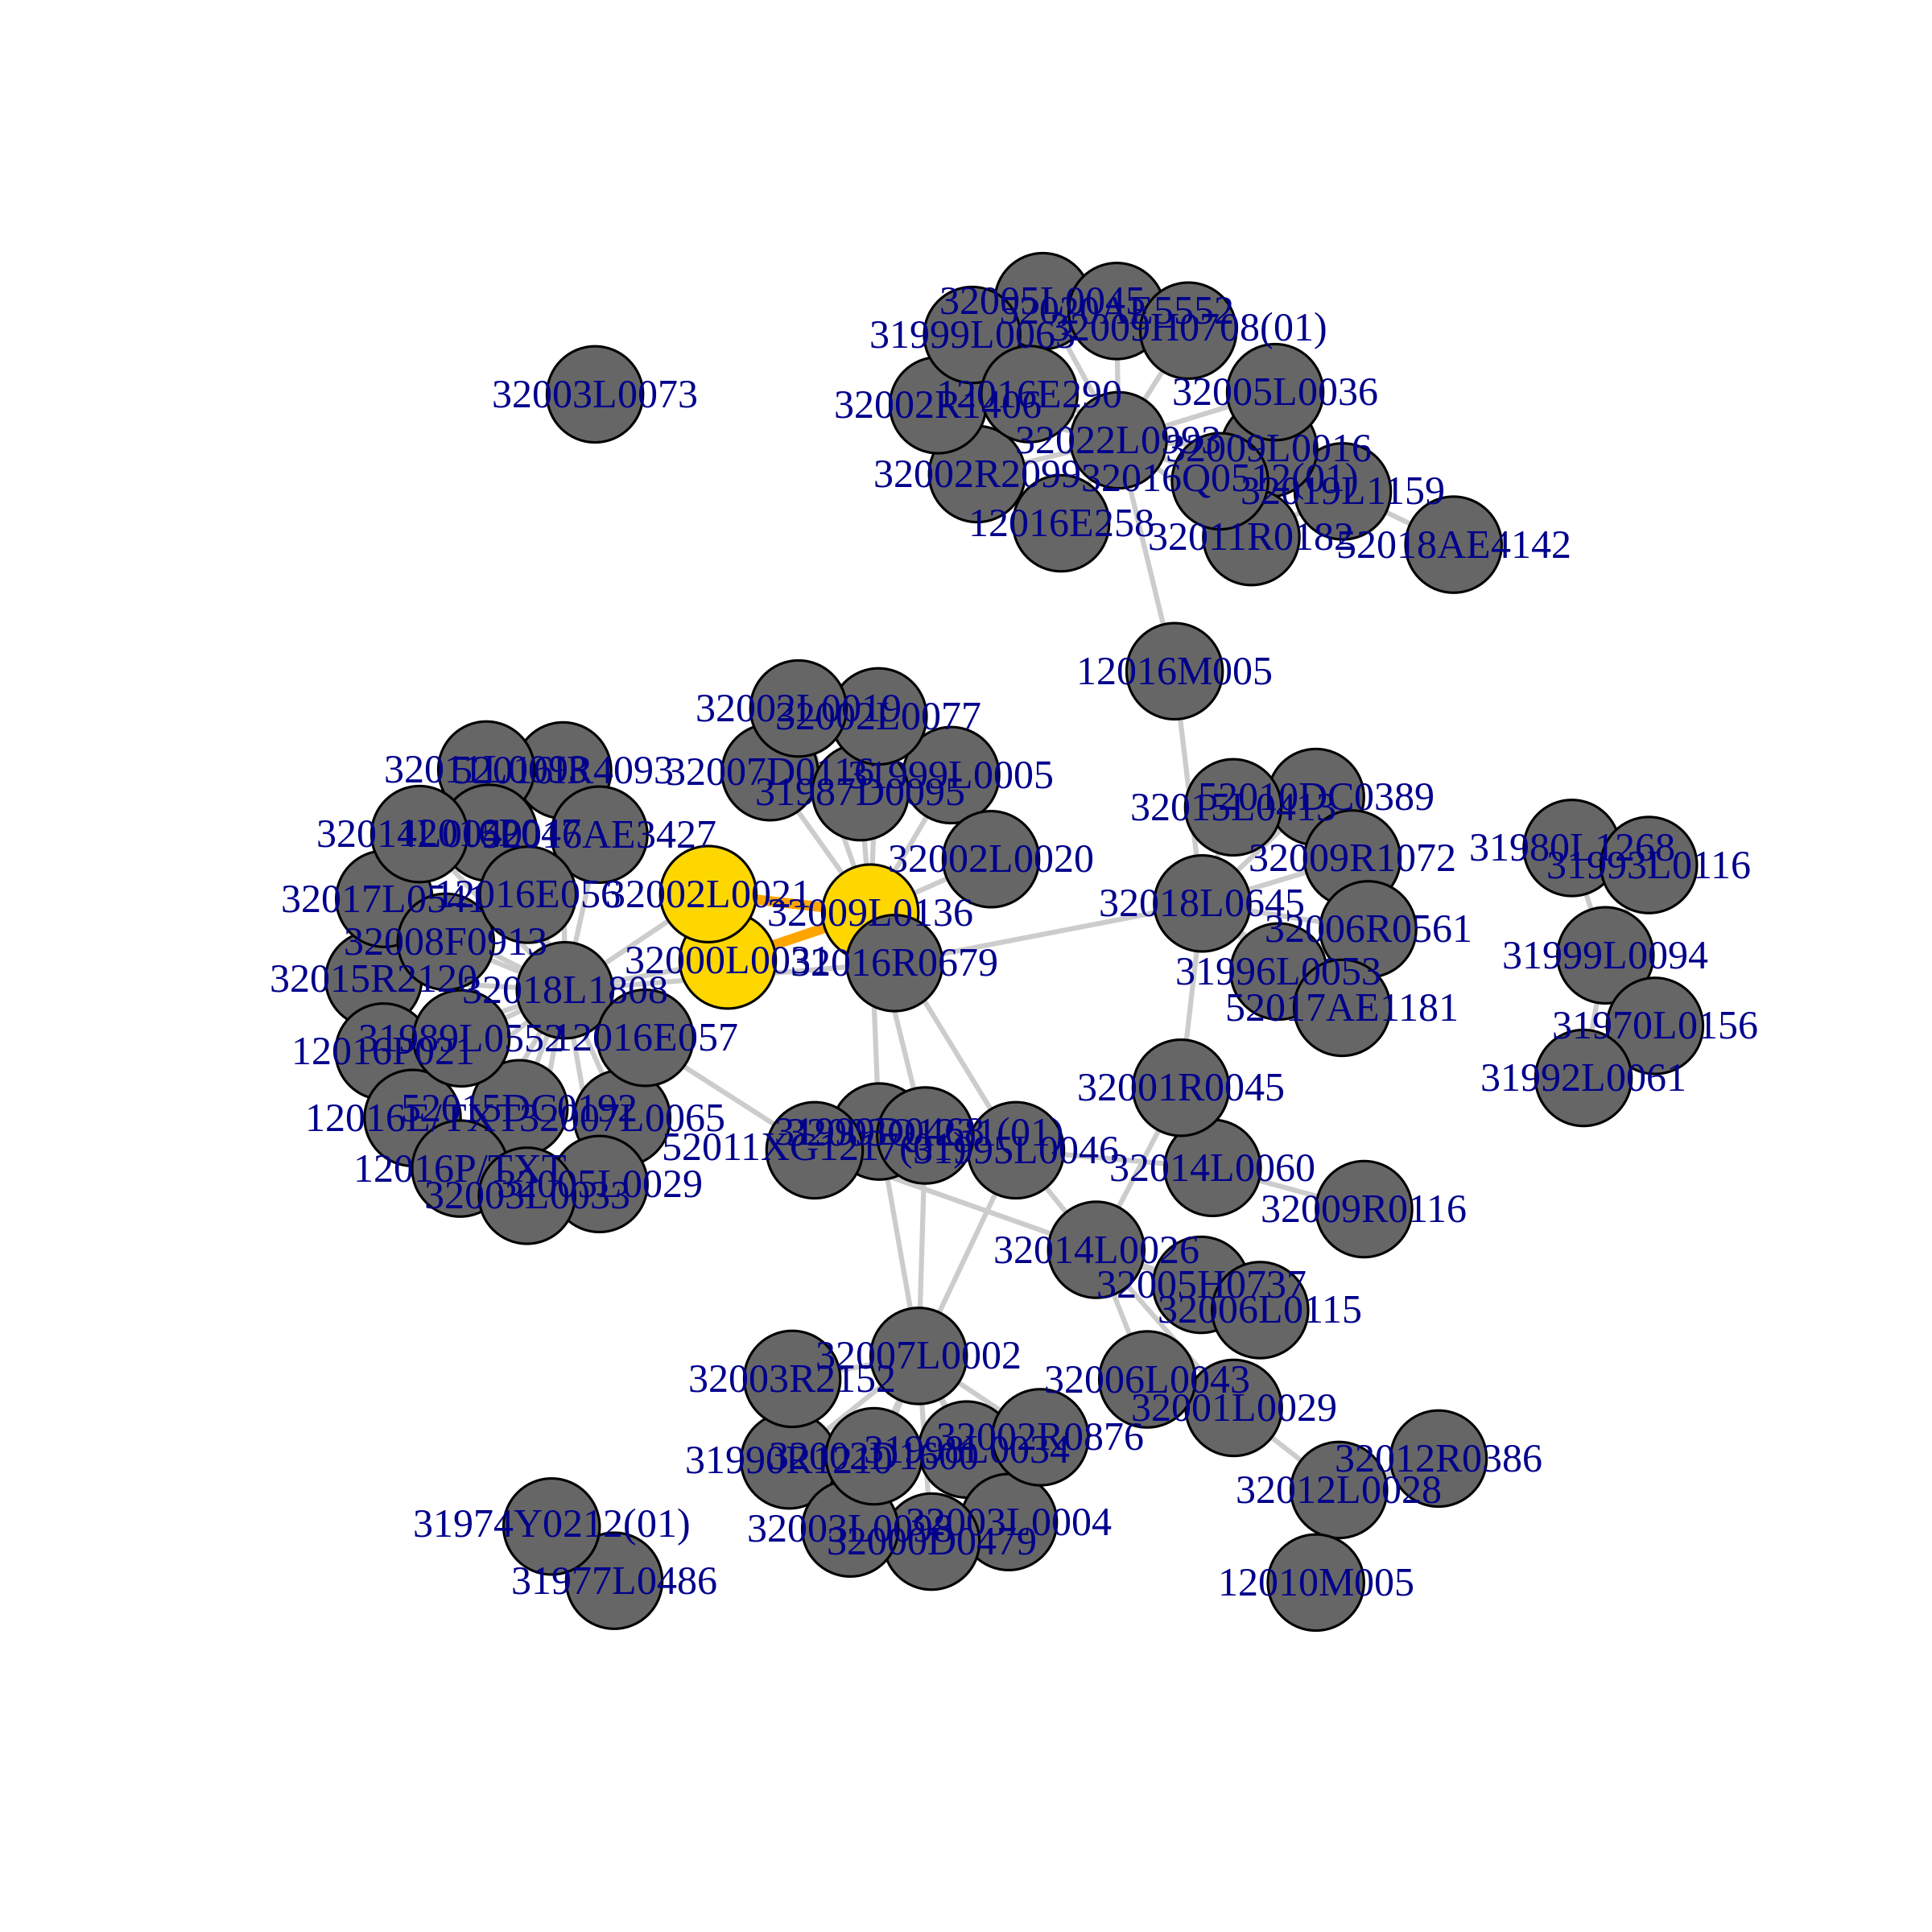

In [62]:
# Changing graph from directed to undirected
net_und <- as.undirected(net)
# matching path between two Authorities
auth_path <- shortest_paths(net_und, 
                            from = V(net_und)[name=="32002L0021"], 
                            to  = V(net_und)[name=="32000L0031"],
                            output = "both") # both path nodes and edges
auth_path

# Generate edge color variable to plot the path:
ecol <- rep("gray80", ecount(net_und))
ecol[unlist(auth_path$epath)] <- "orange"
# Generate edge width variable to plot the path:
ew <- rep(2, ecount(net_und))
ew[unlist(auth_path$epath)] <- 4
# Generate node color variable to plot the path:
vcol <- rep("gray40", vcount(net_und))
vcol[unlist(auth_path$vpath)] <- "gold"

plot(net_und, vertex.color=vcol, edge.color=ecol, edge.width=ew, edge.arrow.mode=0)

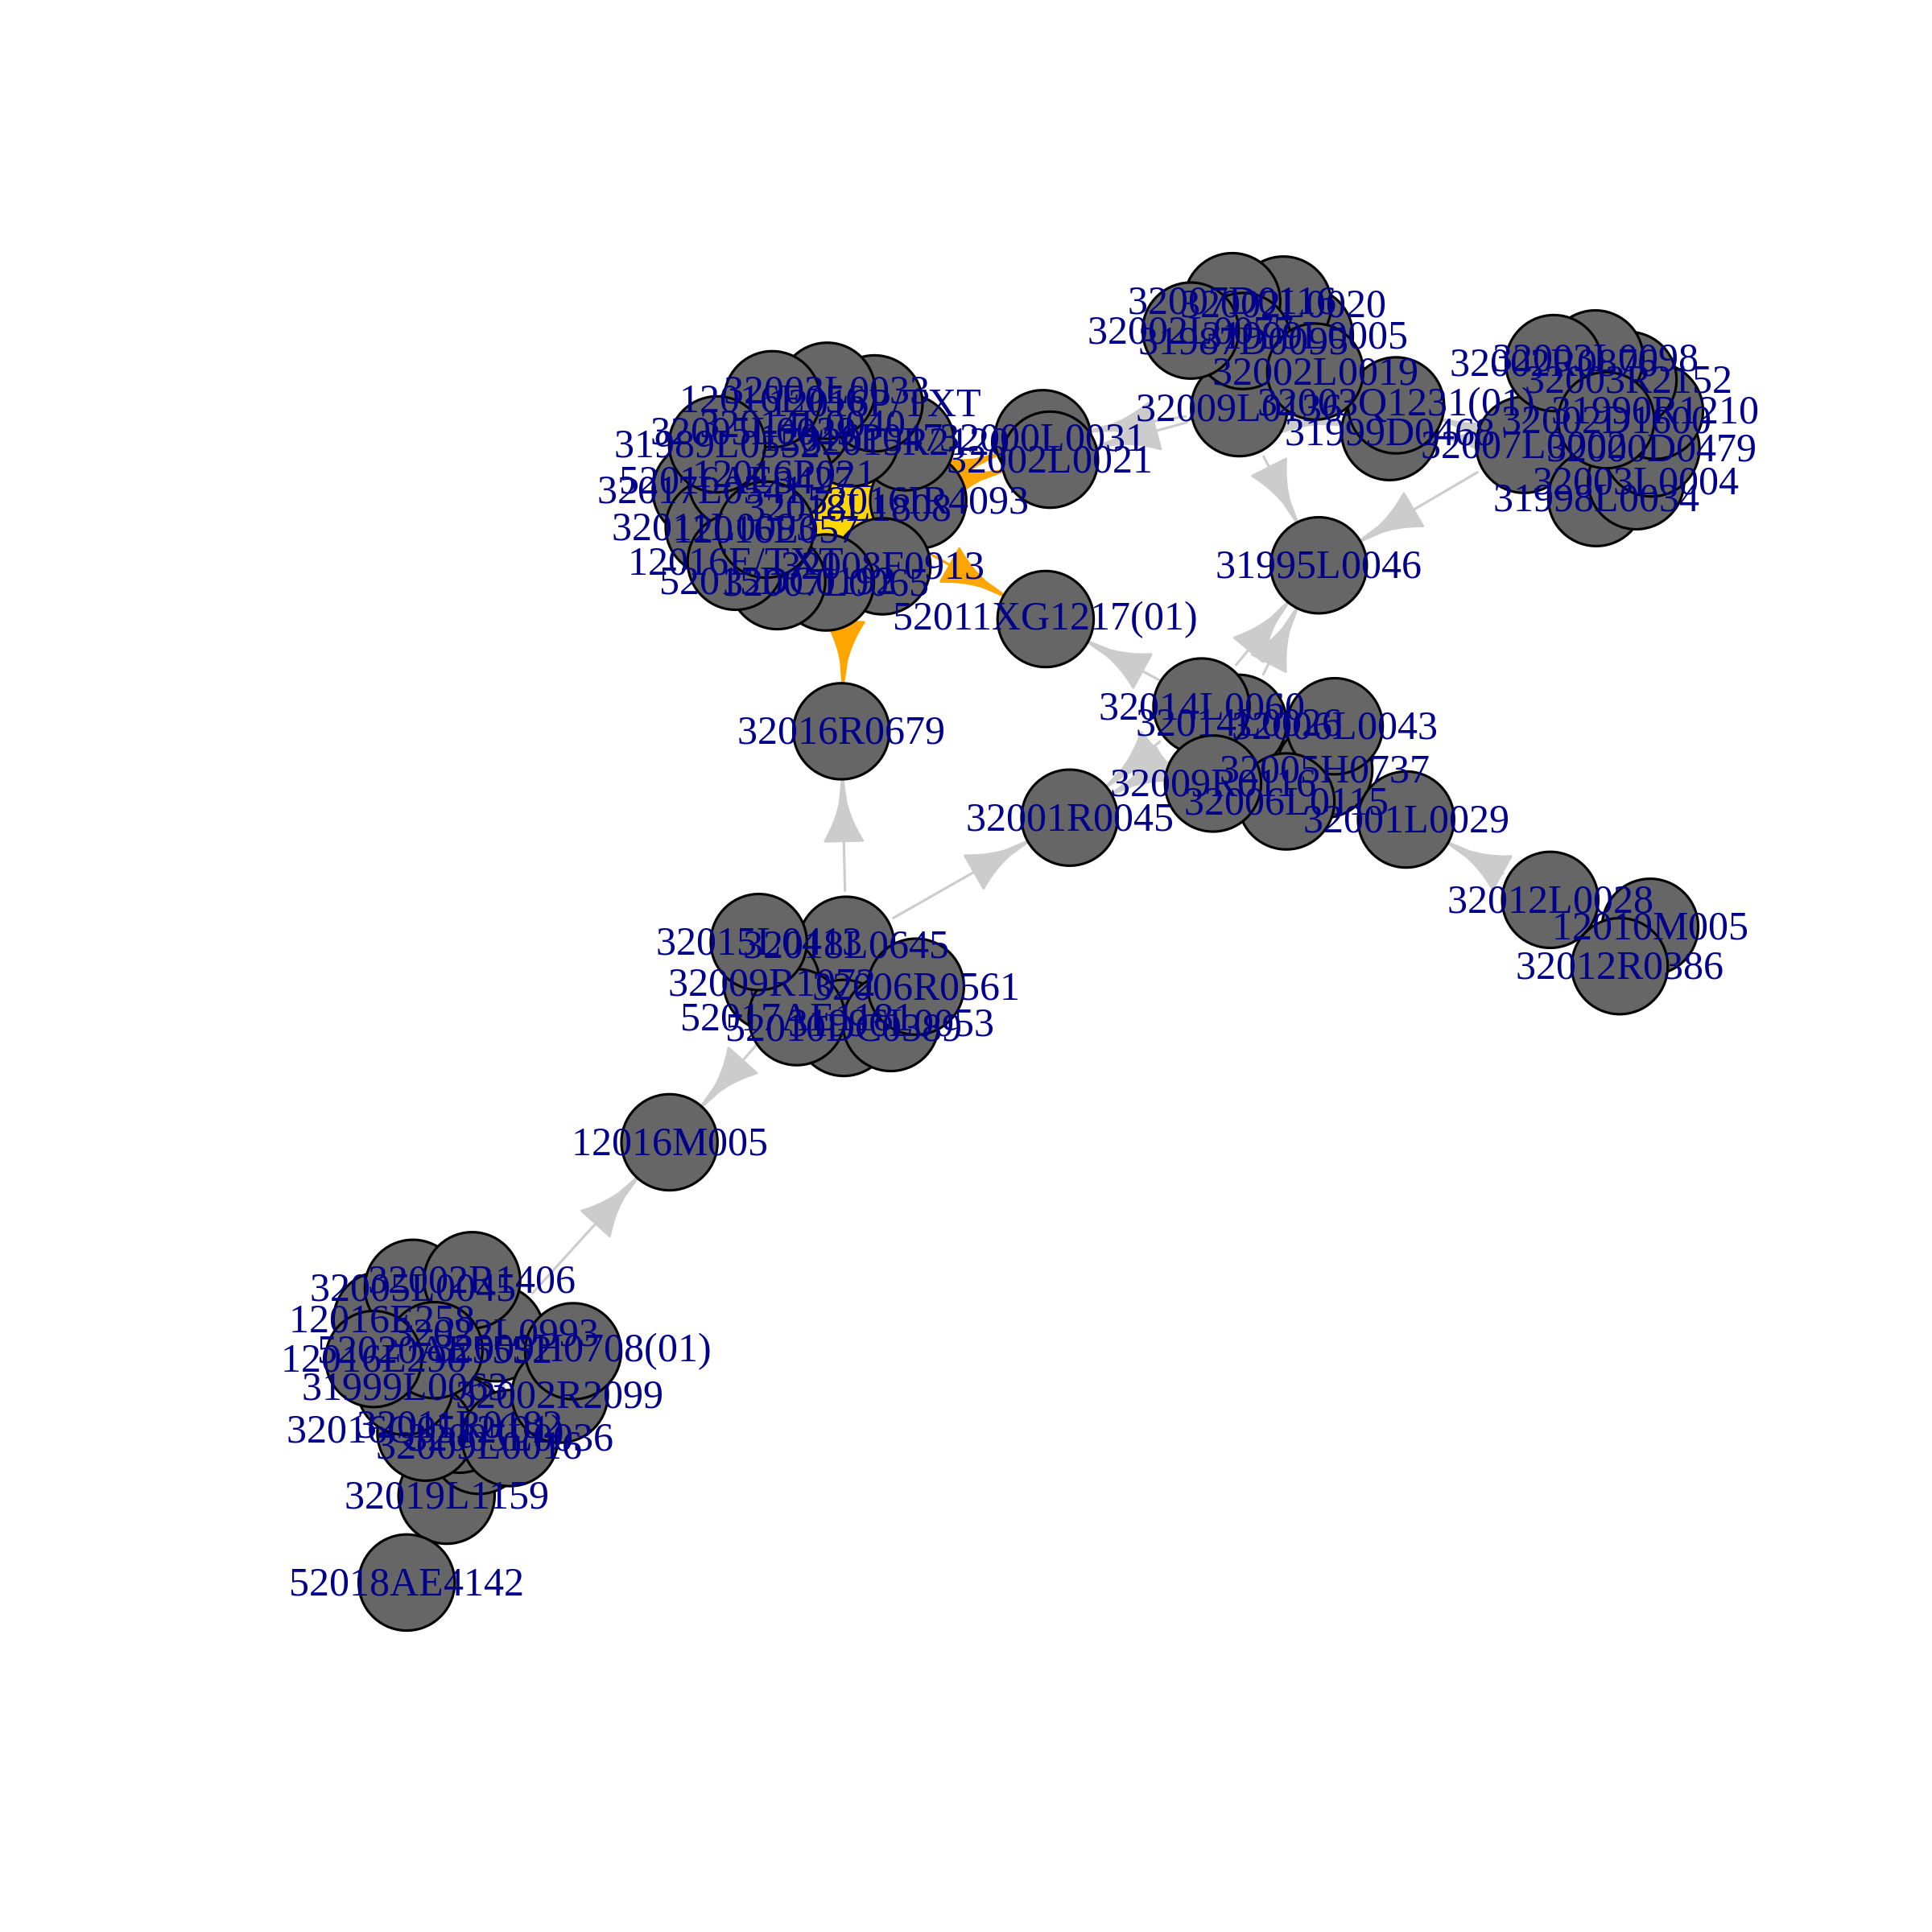

In [63]:
#	Hub's incident edges -  the edges going into or out of a vertex,
inc_edges <- incident(net_large,  V(net_large)[name=="32018L1808"], mode="all")
# Set colors to plot the selected edges.
ecol <- rep("gray80", ecount(net_large))
ecol[inc_edges] <- "orange"
vcol <- rep("grey40", vcount(net_large))
vcol[V(net_large)[name=="32018L1808"]] <- "gold"

plot(net_large, vertex.color=vcol, edge.color=ecol)

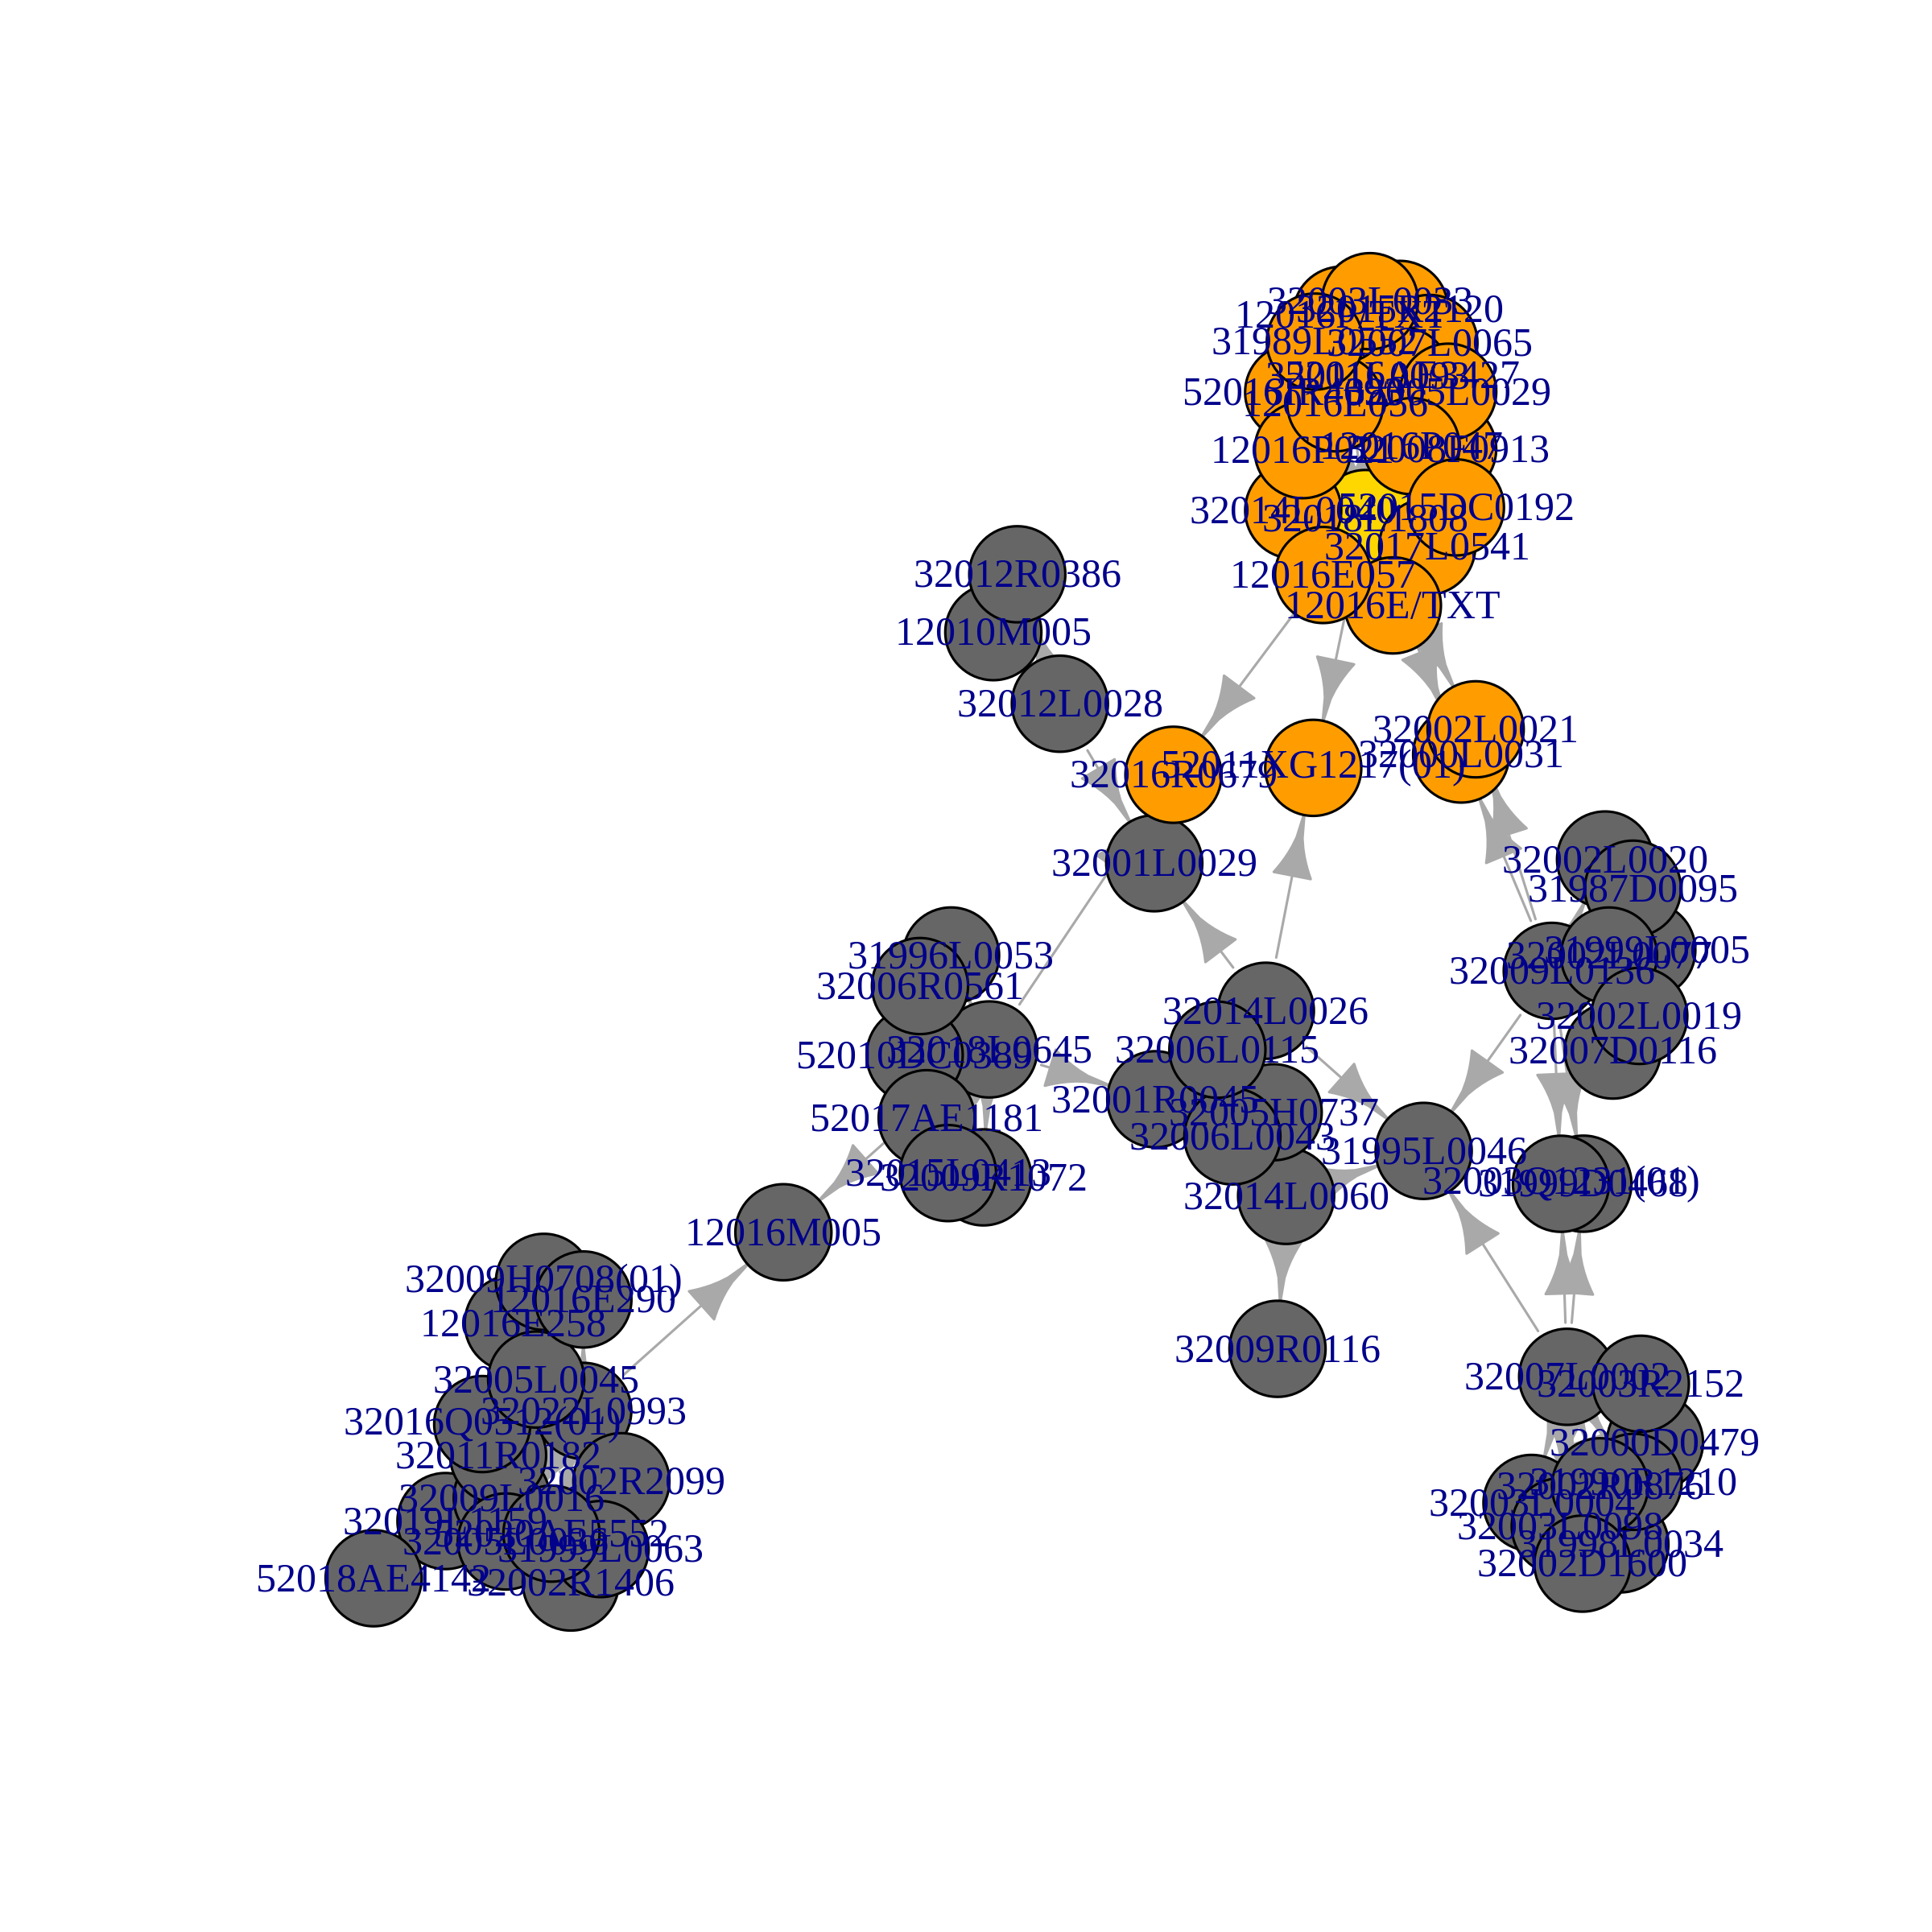

In [64]:
#	Hub's immediate neighbors - all nodes one step out from the focal node
neigh_nodes <- neighbors(net_large, V(net_large)[name=="32018L1808"], mode="out")
# Set colors to plot the neighbors:
vcol[neigh_nodes] <- "#ff9d00"
plot(net_large, vertex.color=vcol)

# Beyond the static network plots

In [65]:
install.packages('visNetwork')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [66]:
library(visNetwork)
data <- toVisNetworkData(net)
data$edges <- data$edges %>% mutate(arrows = c("to"))
data$nodes <- data$nodes %>% mutate(title = paste('<a target="_blank" href="https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX%3A', label, '">Visit EUR-lex</a>', sep = ""))

visNetwork(nodes = data$nodes, edges = data$edges, height = "500px", width = "100%") %>% 
  visOptions(highlightNearest = TRUE, nodesIdSelection = TRUE) %>%
  visLayout(randomSeed = 123) %>%
  visSave(file = "network.html")

# References:

- Interactive network graphs with visNetwork https://cran.r-project.org/web/packages/visNetwork/ 
- and networkD3 https://cran.r-project.org/web/packages/networkD3/
- Network visualization with R https://kateto.net/network-visualization
- Network analysis https://kateto.net/networks-r-igraph
- EUR-lex https://eur-lex.europa.eu/homepage.html